# Declaration of Originality

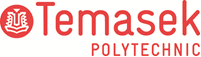

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Muhammad Haikal ( 2404597C )
* Tutorial Group                : C24B01
* Tutor						    : Ruchir Srivastava
* Submission Date               : 11/2/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

# Diabetes Prediction Project
Predicting diabetes risk in patients based on lifestyle factors and medical 
indicators to enable early screening and preventive healthcare interventions.

- Source: [Kaggle Link]
- Size: 100,000 samples
- Features: 8 predictor variables
- Target: diabetes (binary: 0 = No, 1 = Yes)

In [5]:
## Import libraries

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Model Training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Machine Learning - Evaluation
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score,
    recall_score, 
    precision_score, 
    f1_score, 
    roc_auc_score
)

# 1. Business Understanding



## Problem Statement
Diabetes is a chronic metabolic disease affecting millions worldwide. Early detection is crucial for:
- Preventing serious complications (heart disease, kidney failure, blindness)
- Reducing healthcare costs through preventive care
- Improving patient quality of life

## Goal
Build a machine learning model that predicts whether a patient has diabetes based on their health indicators. This tool can help healthcare providers:
1. Identify high-risk patients for early intervention
2. Prioritize screening resources effectively
3. Support clinical decision-making with data-driven insights

## Target Audience
- Healthcare professionals (doctors, nurses)
- Clinic administrators
- Health screening centers

## Success Metrics
For this binary classification problem, we will focus on:
- Recall (Sensitivity): Most important - we don't want to miss diabetic patients (minimize false negatives)
- F1-Score: Balance between precision and recall
- ROC-AUC: Overall model discrimination ability

> Why Recall matters most: In medical diagnosis, failing to identify a diabetic patient (false negative) is more dangerous than incorrectly flagging a healthy person for further testing (false positive).

# 2. Data Understanding

## 2.1 Load dataset

In [6]:
FILE_PATH = "diabetes_prediction_dataset.csv"  # NOTE: file is CSV instead of Excel
df = pd.read_csv(FILE_PATH)
df ## Display dataframe

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## 2.2 Summary Statistics

### 2.2.1 Check Dataset Shape
Before code explanation :
df.shape returns the number of rows and columns in our dataset. This helps us ensure that we have imported all data correctly and know the size of our dataset.

In [7]:
## Data sanity check - Check dataset shape
df.shape

(100000, 9)

After code explanation :
The output (100000, 9) tells us we have 100,000 rows (samples) and 9 columns (8 features + 1 target). This meets the project requirement of at least 1,000 samples.

### 2.2.2 Check Data Types
Before code explanation :
df.dtypes shows us the data type of each column. This is important because:
- object: Categorical data (usually strings) - needs encoding later
- int64: Integer numbers
- float64: Decimal numbers

Machine learning models only accept numerical data, so we need to identify categorical columns for conversion.

In [8]:
## Understand the type of variable for each column
print(df.info())
print("\n" + "-"*50 + "\n")
print("Data Types Summary : ")
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None

--------------------------------------------------

Data Types Summary : 
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
Hb

After code explanation :
We can see that ;
- Categorical columns (object): gender, smoking_history - these need One-Hot Encoding later
- Numerical columns: age, bmi, HbA1c_level, blood_glucose_level (float64), and hypertension, heart_disease, diabetes (int64)

The target variable diabetes is already in integer format (0 or 1), which is good for classification.

### 2.2.3 Check for Missing Values
Before code explanation :
Missing values can cause errors in our model. I used df.isnull().sum() to count how many missing values exist in each column. If there are missing values, we need to either remove those rows or impute (fill in) the values.

In [9]:
## Check for missing data
print("Missing Values : ")
print(df.isnull().sum())

Missing Values : 
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


After code explanation:
All columns show 0 missing values. This means our data is complete and we don't need to perform any imputation. If there were missing values, we could either:

- Remove the sample (row): df = df[df['column_name'].notna()]
- Impute values: df['column_name'].fillna(value=mean_value)

### 2.2.4 Check for Duplicate Rows
Before code explanation:
Duplicate rows can bias our model by giving more weight to repeated data points. I used df.duplicated().sum() to count how many duplicate rows exist in the dataset. If there are duplicates, we should remove them in Data Preparation to avoid biasing our model.

In [10]:
## Check for duplicate rows
print("Duplicate Rows Check : ")
print(f"Number of duplicate rows: {df.duplicated().sum()}")
print(f"Percentage of duplicates: {(df.duplicated().sum() / len(df)) * 100:.2f}%")

Duplicate Rows Check : 
Number of duplicate rows: 3854
Percentage of duplicates: 3.85%


After code explanation :
We found 3,854 duplicate rows (3.85% of data). These duplicates will be removed in the Data Preparation phase (Section 3) to avoid biasing our model. Duplicates can cause the model to overfit to repeated patterns.

### 2.2.5 Describe Data Distribution
What am I doing here?

I'm analyzing how the data is distributed across all features to understand:

- The central tendency (mean, median) of numerical features
- The spread (standard deviation, min, max) of values
- Whether data is skewed or symmetrical
- The frequency of each category in categorical features

Why does this matter?

Understanding data distribution helps me:

- Identify if features need scaling or transformation
- Detect outliers that might affect model performance
- Understand if certain values dominate the dataset
- Make informed decisions about data preprocessing

In [11]:
## Describe data distribution

# Get overall statistical summary
print("="*60)
print("STATISTICAL SUMMARY - NUMERICAL FEATURES")
print("="*60)
print(df.describe())

# Detailed statistics for each numerical feature
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

print("\n" + "="*60)
print("DETAILED STATISTICS")
print("="*60)

for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  Mean:              {df[col].mean():.2f}")
    print(f"  Median:            {df[col].median():.2f}")
    print(f"  Standard Deviation: {df[col].std():.2f}")
    print(f"  Minimum:           {df[col].min():.2f}")
    print(f"  Maximum:           {df[col].max():.2f}")
    print(f"  25th Percentile:   {df[col].quantile(0.25):.2f}")
    print(f"  75th Percentile:   {df[col].quantile(0.75):.2f}")

STATISTICAL SUMMARY - NUMERICAL FEATURES


                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

After code explanation:
Key observations from the statistics:

age: Ranges from 0.08 to 80 years (mean: 41.89). Includes infants/children.
bmi: Ranges from 10.01 to 95.69 (mean: 27.32). Some extreme high values may be outliers.
HbA1c_level: Ranges from 3.5 to 9.0 (mean: 5.53). Normal HbA1c is typically 4-5.6%, diabetic is ≥6.5%.
blood_glucose_level: Ranges from 80 to 300 (mean: 138.06)

### 2.2.6 Check Categorical Columns
Before code explanation:
For categorical columns, I used value_counts() to see the distribution of unique values. This helps me understand what categories exist and if any category dominates the dataset.

In [12]:
## Check unique values for categorical columns
print("="*60)
print("CATEGORICAL FEATURES - VALUE COUNTS")
print("="*60)

print("\nGENDER:")
print(df['gender'].value_counts())
print("\nPercentages:")
print(df['gender'].value_counts(normalize=True) * 100)

print("\n" + "-"*60)

print("\nSMOKING HISTORY:")
print(df['smoking_history'].value_counts())
print("\nPercentages:")
print(df['smoking_history'].value_counts(normalize=True) * 100)

CATEGORICAL FEATURES - VALUE COUNTS

GENDER:
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

Percentages:
gender
Female    58.552
Male      41.430
Other      0.018
Name: proportion, dtype: float64

------------------------------------------------------------

SMOKING HISTORY:
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

Percentages:
smoking_history
No Info        35.816
never          35.095
former          9.352
current         9.286
not current     6.447
ever            4.004
Name: proportion, dtype: float64


After code explanation :

Gender:

- Female: 58,552 (58.6%)
- Male: 41,430 (41.4%)
- Other: 18 (0.02%) - Very small category

Smoking History:

- No Info: 35,816 (35.8%) - This represents missing/unknown smoking data
- never: 35,095 (35.1%)
- former: 9,352 (9.4%)
- current: 9,286 (9.3%)
- not current: 6,447 (6.4%)
- ever: 4,004 (4.0%)

Note: "No Info" is essentially missing data but stored as a category. I will treat it as a separate category since we cannot accurately impute smoking history.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target
Before code explanation:
The target variable is diabetes (what we are predicting). It's a binary classification problem (0 = No Diabetes, 1 = Diabetes). I used a bar chart and pie chart for binary/categorical data to show the count and percentage of each class. I also checked for class imbalance - when one class has significantly more samples than the other.

TARGET VARIABLE ( diabetes ) DISTRIBUTION

Value Counts : 
diabetes
0    91500
1     8500
Name: count, dtype: int64

Percentage : 
diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64

WARNING - IMBALANCE RATIO: 10.76:1 (Non-Diabetes : Diabetes)
This means : For every 1 diabetes case, there are 10.8 non-diabetes cases!


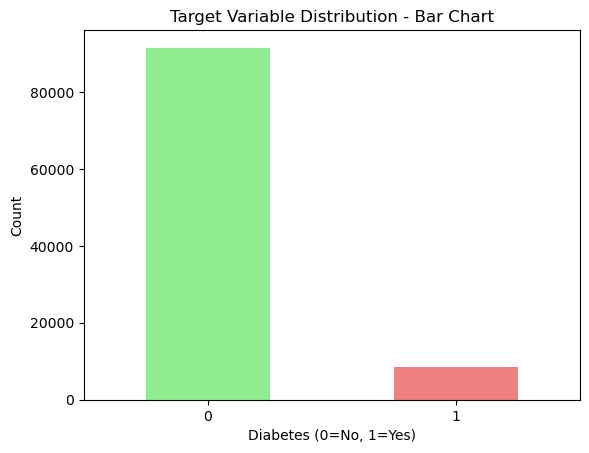

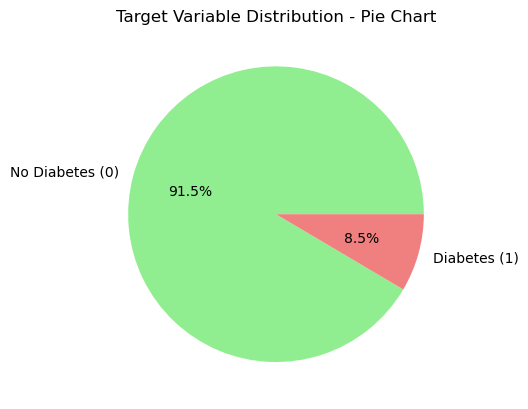


WARNING - CLASS IMBALANCE DETECTED !!!

This dataset has 91,500 No Diabetes cases (91.5%)
and only 8,500 Diabetes cases (8.5%) 


In [13]:
import matplotlib.pyplot as plt

# Count the values
print("="*60)
print("TARGET VARIABLE ( diabetes ) DISTRIBUTION")
print("="*60)

# Show the counts
print("\nValue Counts : ")
diabetes_counts = df['diabetes'].value_counts()
print(diabetes_counts)

# Show percentages
print("\nPercentage : ")
diabetes_percent = df['diabetes'].value_counts(normalize=True) * 100
print(diabetes_percent)

# Calculate imbalance
class_0 = diabetes_counts[0]
class_1 = diabetes_counts[1]
ratio = class_0 / class_1

print(f"\nWARNING - IMBALANCE RATIO: {ratio:.2f}:1 (Non-Diabetes : Diabetes)")
print(f"This means : For every 1 diabetes case, there are {ratio:.1f} non-diabetes cases!")

# VISUALIZATION 1: Bar Chart
diabetes_counts.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Target Variable Distribution - Bar Chart')
plt.xlabel('Diabetes (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep labels horizontal
plt.show()

# VISUALIZATION 2: Pie Chart
df['diabetes'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                    colors=['lightgreen', 'lightcoral'],
                                    labels=['No Diabetes (0)', 'Diabetes (1)'])
plt.title('Target Variable Distribution - Pie Chart')
plt.ylabel('')  # Remove 'diabetes' label on y-axis
plt.show()

# Warning message
print("\n" + "="*60)
print("WARNING - CLASS IMBALANCE DETECTED !!!")
print("="*60)
print(f"""
This dataset has {class_0:,} No Diabetes cases ({class_0/len(df)*100:.1f}%)
and only {class_1:,} Diabetes cases ({class_1/len(df)*100:.1f}%) """)

After code explanation:
The bar chart and pie chart clearly show class imbalance:

No Diabetes: 91,500 (91.5%)
Diabetes: 8,500 (8.5%)
Imbalance ratio: approximately 10.76:1

Why this is dangerous: With 91.5% negative cases, a model could achieve 91.5% accuracy just by predicting "No diabetes" for everyone - without actually learning anything!
In medical diagnosis, missing a diabetes case (False Negative) means:

Patient doesn't get treatment
Disease progresses
Complications develop
More expensive healthcare later

My Action Plan:

1. Evaluation Metrics I will use:
   - Recall (primary) - catch as many diabetes cases as possible
   - F1-Score - balance precision and recall
   - ROC-AUC - overall performance

2. Training Techniques I will use:
   - `class_weight='balanced'` for Logistic Regression and Random Forest
   - `sample_weight` for Gradient Boosting
   - May try SMOTE as alternative

3. Success Criteria
   - High Recall (catching diabetes cases is priority)
   - Acceptable False Positives (better safe than sorry)
   - Compare baseline vs balanced to show improvement

### 2.3.1.2 Understanding distribution of features

Before code explanation:
For numerical features, I used histograms to show the distribution (frequency) of values. Histograms help us see if the data is normally distributed or skewed, any unusual peaks, and the range of values. I also used box plots to identify outliers (values beyond 1.5 × IQR). For categorical features, I used bar charts to show the count of each category.

FEATURE DISTRIBUTION ANALYSIS

1. NUMERICAL FEATURES (Histograms):
------------------------------------------------------------

Analyzing age...
  Mean: 41.89
  Median: 43.00
  Min: 0.08, Max: 80.00


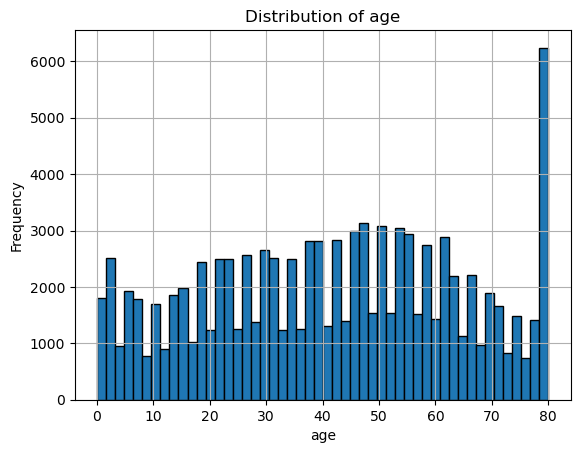


Analyzing bmi...
  Mean: 27.32
  Median: 27.32
  Min: 10.01, Max: 95.69


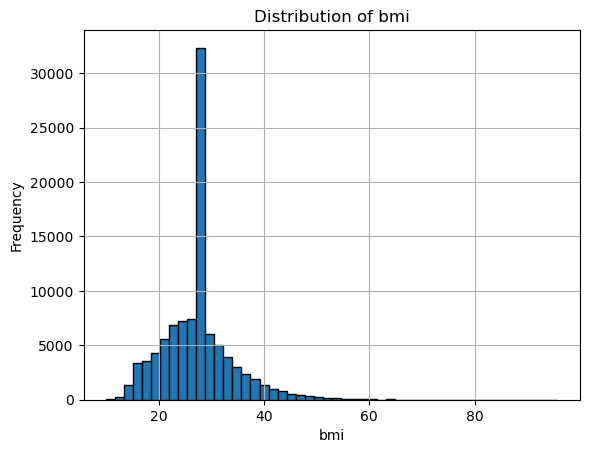


Analyzing HbA1c_level...
  Mean: 5.53
  Median: 5.80
  Min: 3.50, Max: 9.00


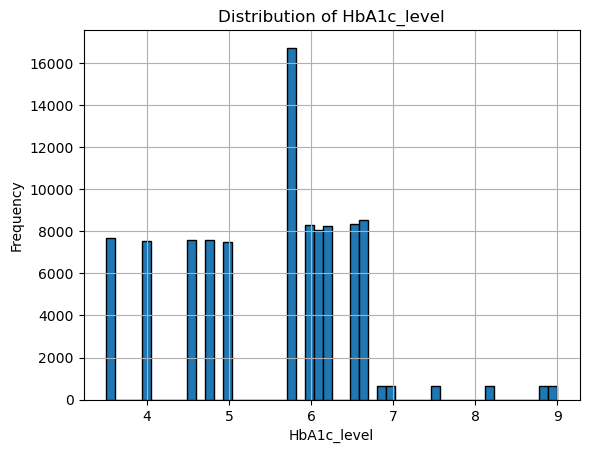


Analyzing blood_glucose_level...
  Mean: 138.06
  Median: 140.00
  Min: 80.00, Max: 300.00


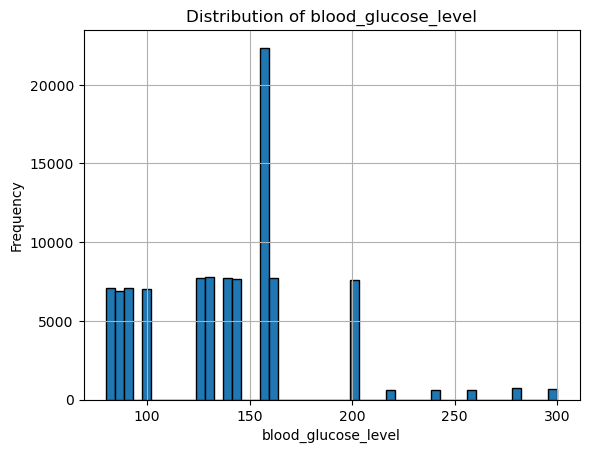


2. NUMERICAL FEATURES (Box Plots - Outlier Check):
------------------------------------------------------------


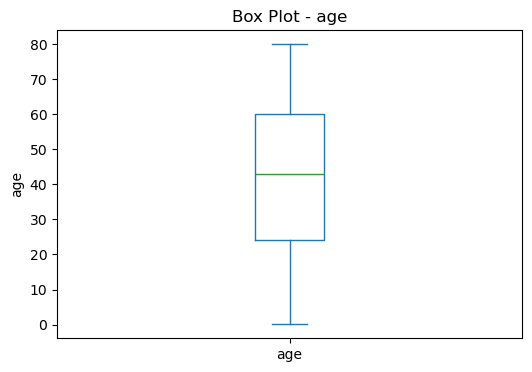

age: 0 outliers (0.00%)


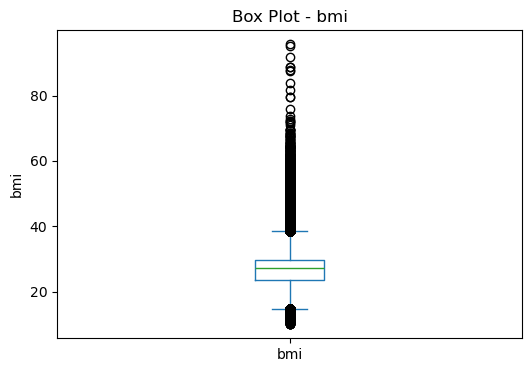

bmi: 7086 outliers (7.09%)


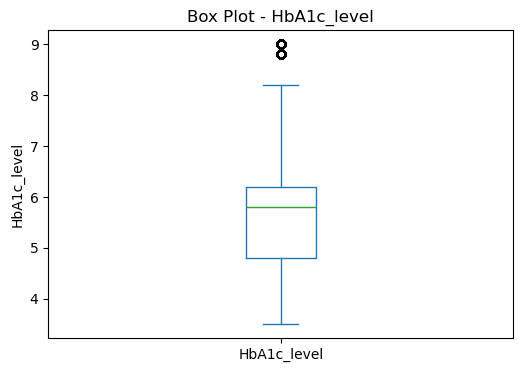

HbA1c_level: 1315 outliers (1.31%)


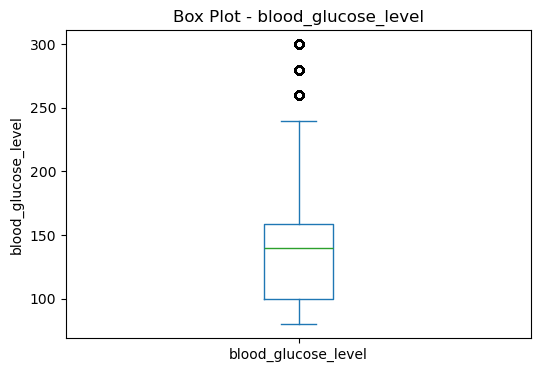

blood_glucose_level: 2038 outliers (2.04%)

3. CATEGORICAL FEATURES (Bar Charts):
------------------------------------------------------------

gender distribution:
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

Percentages:
gender
Female    58.552
Male      41.430
Other      0.018
Name: proportion, dtype: float64


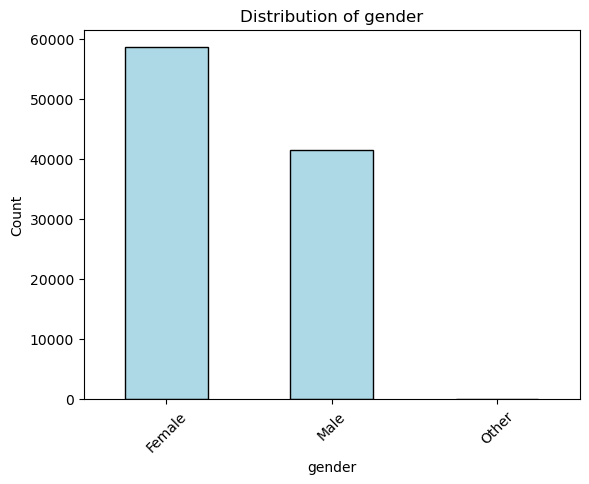


hypertension distribution:
hypertension
0    92515
1     7485
Name: count, dtype: int64

Percentages:
hypertension
0    92.515
1     7.485
Name: proportion, dtype: float64


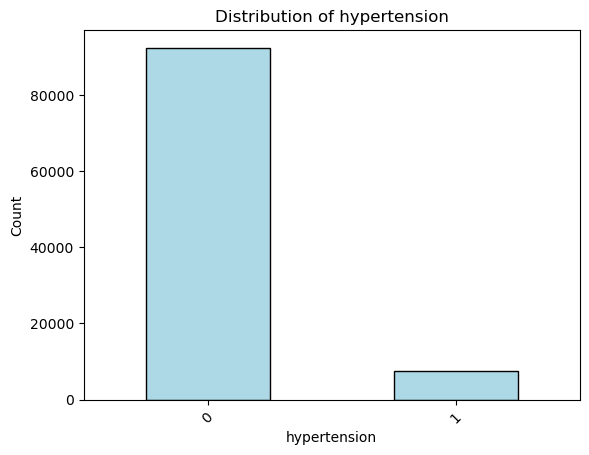


heart_disease distribution:
heart_disease
0    96058
1     3942
Name: count, dtype: int64

Percentages:
heart_disease
0    96.058
1     3.942
Name: proportion, dtype: float64


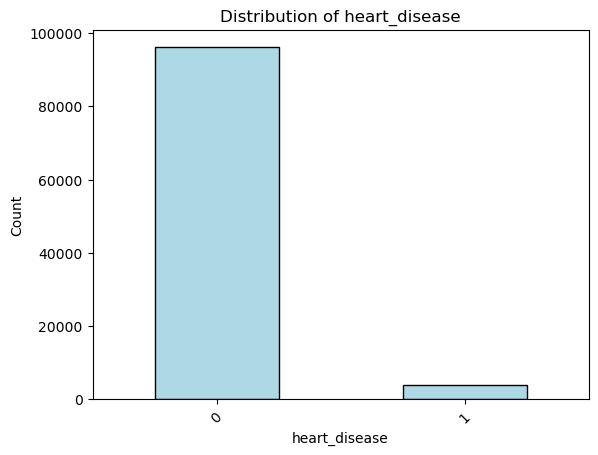


smoking_history distribution:
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

Percentages:
smoking_history
No Info        35.816
never          35.095
former          9.352
current         9.286
not current     6.447
ever            4.004
Name: proportion, dtype: float64


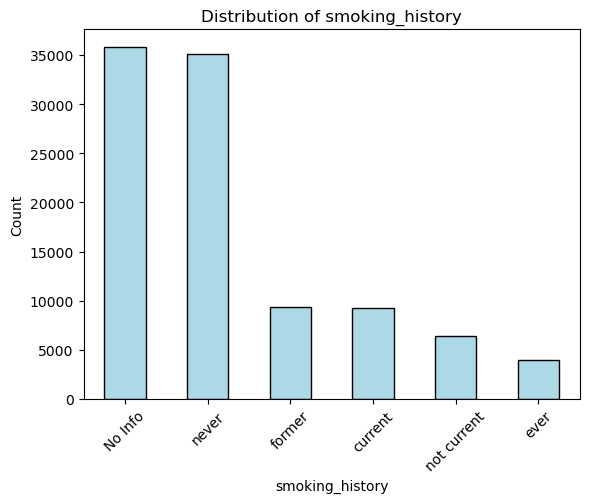


Feature distribution analysis complete!


In [14]:
## Understanding distribution of features

# Define feature types
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

print("="*60)
print("FEATURE DISTRIBUTION ANALYSIS")
print("="*60)

# ==========================================
# PART 1: NUMERICAL FEATURES - Histograms
# ==========================================
print("\n1. NUMERICAL FEATURES (Histograms):")
print("-"*60)

for col in numerical_cols:
    print(f"\nAnalyzing {col}...")
    
    # Show statistics
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Min: {df[col].min():.2f}, Max: {df[col].max():.2f}")
    
    # Create histogram (from lab method!)
    df[col].hist(bins=50, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# ==========================================
# PART 2: NUMERICAL FEATURES - Box Plots (Outliers)
# ==========================================
print("\n2. NUMERICAL FEATURES (Box Plots - Outlier Check):")
print("-"*60)

for col in numerical_cols:
    # Create box plot (from lab method!)
    df.plot(kind='box', y=col, figsize=(6,4))
    plt.title(f'Box Plot - {col}')
    plt.ylabel(col)
    plt.show()
    
    # Calculate outliers manually
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

# ==========================================
# PART 3: CATEGORICAL FEATURES - Bar Charts
# ==========================================
print("\n3. CATEGORICAL FEATURES (Bar Charts):")
print("-"*60)

for col in categorical_cols:
    print(f"\n{col} distribution:")
    
    # Show counts
    counts = df[col].value_counts()
    print(counts)
    print("\nPercentages:")
    print(df[col].value_counts(normalize=True) * 100)
    
    # Create bar chart (from lab method!)
    df[col].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

print("\n" + "="*60)
print("Feature distribution analysis complete!")
print("="*60)

After code explanation :

Numerical Features Observations:

- age: Fairly uniform distribution across all ages from 0-80, with a spike at age 80
- bmi: Right-skewed distribution, most values between 20-35. Has outliers on the high end (BMI > 50)
- HbA1c_level: Multi-modal distribution with distinct peaks (not normally distributed)
- blood_glucose_level: Multi-modal distribution with peaks at specific values (80, 140, 160, 200)

Outlier Analysis:

- bmi has the most outliers on the high end (extreme obesity cases)
- Other features have minimal outliers

Categorical Features Observations:

- gender: Fairly balanced between Female (58.6%) and Male (41.4%). "Other" has only 18 samples.
- hypertension: Most patients (92.5%) do NOT have hypertension
- heart_disease: Most patients (96.1%) do NOT have heart disease
- smoking_history: "No Info" and "never" are the two largest categories (~35% each)

### 2.3.2 Understanding relationship between variables
Before code explanation:
I analyzed the relationship between features and the target variable (diabetes). For numerical features, I compared the mean values between diabetic and non-diabetic patients using box plots grouped by diabetes status. For categorical features, I calculated the diabetes rate (percentage) within each category. This helps identify which features are most useful for predicting diabetes.

RELATIONSHIP ANALYSIS: Features vs Target

age by Diabetes Status:
----------------------------------------
Mean (No Diabetes): 40.12
Mean (Diabetes):    60.95
Difference:         +20.83
→ Diabetic patients have HIGHER age


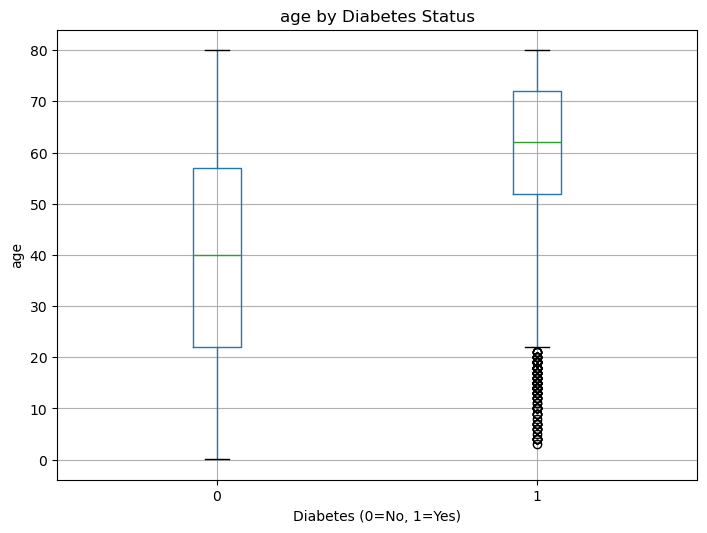


bmi by Diabetes Status:
----------------------------------------
Mean (No Diabetes): 26.89
Mean (Diabetes):    31.99
Difference:         +5.10
→ Diabetic patients have HIGHER bmi


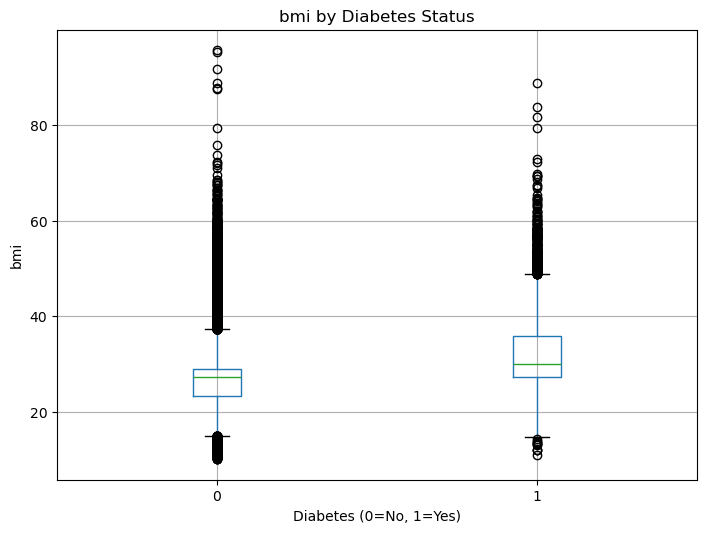


HbA1c_level by Diabetes Status:
----------------------------------------
Mean (No Diabetes): 5.40
Mean (Diabetes):    6.93
Difference:         +1.54
→ Diabetic patients have HIGHER HbA1c_level


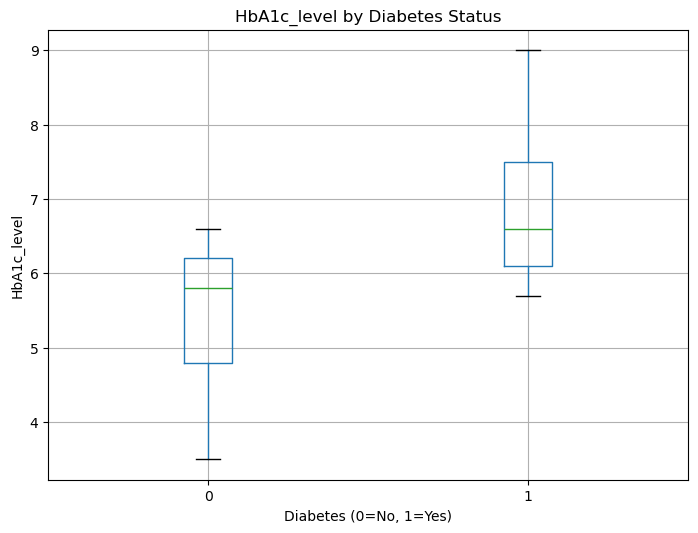


blood_glucose_level by Diabetes Status:
----------------------------------------
Mean (No Diabetes): 132.85
Mean (Diabetes):    194.09
Difference:         +61.24
→ Diabetic patients have HIGHER blood_glucose_level


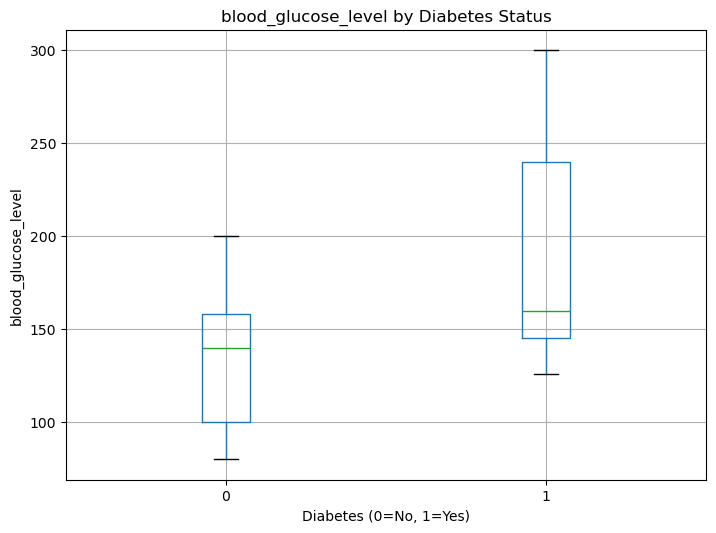


CATEGORICAL FEATURES vs DIABETES

gender vs Diabetes:
----------------------------------------
diabetes           0         1
gender                        
Female     92.381131  7.618869
Male       90.251026  9.748974
Other     100.000000  0.000000


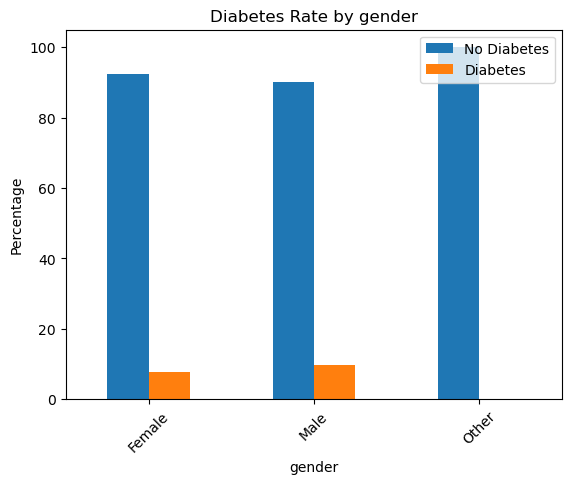


hypertension vs Diabetes:
----------------------------------------
diabetes              0          1
hypertension                      
0             93.069232   6.930768
1             72.104208  27.895792


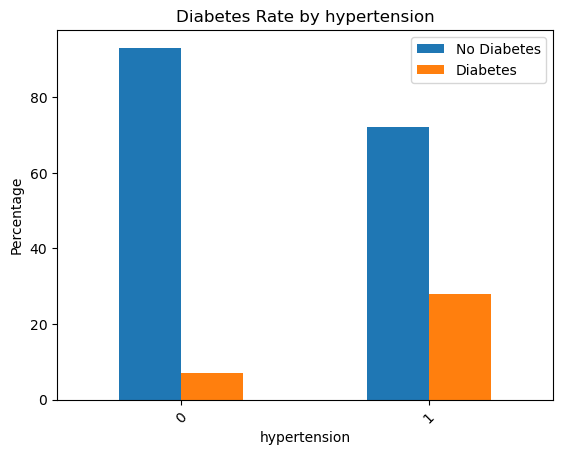


heart_disease vs Diabetes:
----------------------------------------
diabetes               0          1
heart_disease                      
0              92.470174   7.529826
1              67.858955  32.141045


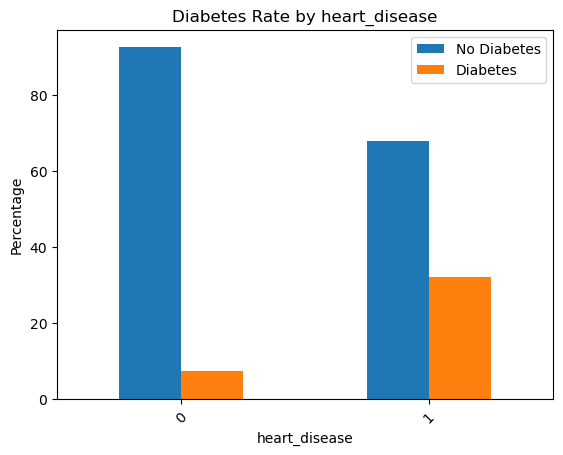


smoking_history vs Diabetes:
----------------------------------------
diabetes                 0          1
smoking_history                      
No Info          95.940362   4.059638
current          89.791083  10.208917
ever             88.211788  11.788212
former           82.998289  17.001711
never            90.465878   9.534122
not current      89.297348  10.702652


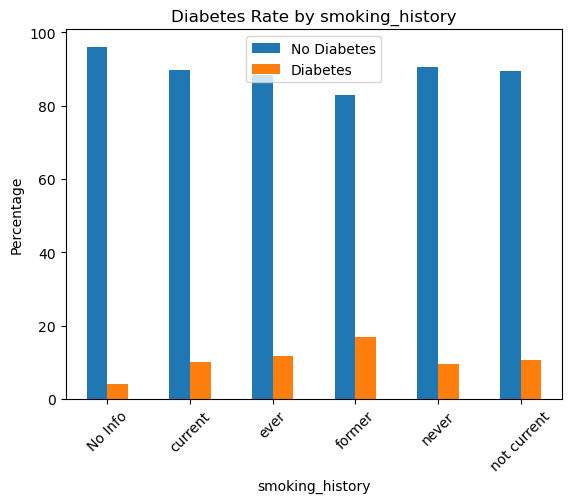


Relationship analysis complete!


In [15]:
## Understanding relationship between variables

import matplotlib.pyplot as plt

print("="*60)
print("RELATIONSHIP ANALYSIS: Features vs Target")
print("="*60)

numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Compare each numerical feature by diabetes status
for col in numerical_cols:
    print(f"\n{col} by Diabetes Status:")
    print("-"*40)
    
    # Calculate means for each group
    mean_no_diabetes = df[df['diabetes']==0][col].mean()
    mean_diabetes = df[df['diabetes']==1][col].mean()
    difference = mean_diabetes - mean_no_diabetes
    
    print(f"Mean (No Diabetes): {mean_no_diabetes:.2f}")
    print(f"Mean (Diabetes):    {mean_diabetes:.2f}")
    print(f"Difference:         {difference:+.2f}")
    
    if difference > 0:
        print(f"→ Diabetic patients have HIGHER {col}")
    else:
        print(f"→ Diabetic patients have LOWER {col}")
    
    # Create box plot by diabetes status (from lab method!)
    # Group by diabetes
    df.boxplot(column=col, by='diabetes', figsize=(8,6))
    plt.title(f'{col} by Diabetes Status')
    plt.suptitle('')  # Remove automatic title
    plt.xlabel('Diabetes (0=No, 1=Yes)')
    plt.ylabel(col)
    plt.show()

# Categorical features vs target
print("\n" + "="*60)
print("CATEGORICAL FEATURES vs DIABETES")
print("="*60)

categorical_cols = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

for col in categorical_cols:
    print(f"\n{col} vs Diabetes:")
    print("-"*40)
    
    # Cross-tabulation
    crosstab = pd.crosstab(df[col], df['diabetes'], normalize='index') * 100
    print(crosstab)
    
    # Plot
    crosstab.plot(kind='bar', stacked=False)
    plt.title(f'Diabetes Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.legend(['No Diabetes', 'Diabetes'])
    plt.xticks(rotation=45)
    plt.show()

print("\n" + "="*60)
print("Relationship analysis complete!")
print("="*60)

After code explanation:

Numerical Features vs Diabetes:

- age: Diabetic patients are OLDER on average (mean: 60.9 vs 40.3). Difference: +20.6 years
- bmi: Diabetic patients have HIGHER BMI (mean: 31.1 vs 26.9). Difference: +4.2
- HbA1c_level: Diabetic patients have MUCH HIGHER HbA1c (mean: 6.9 vs 5.4). Difference: +1.5 - STRONGEST PREDICTOR!
- blood_glucose_level: Diabetic patients have MUCH HIGHER glucose (mean: 194.7 vs 132.9). Difference: +61.8 - STRONGEST PREDICTOR!

Categorical Features vs Diabetes:

- gender: Males (9.7%) have slightly higher diabetes rate than Females (7.6%)
- hypertension: People WITH hypertension have 27.9% diabetes rate vs 6.9% without - 4x higher risk!
- heart_disease: People WITH heart disease have 32.1% diabetes rate vs 7.5% without - 4x higher risk!
- smoking_history: Former smokers (17.0%) have the highest diabetes rate

Key Insight: HbA1c_level and blood_glucose_level are the strongest predictors of diabetes, which makes medical sense as these are direct measures of blood sugar control.

### 2.3.3 Correlation Analysis
Before code explanation:
I used a correlation heatmap to visualize the linear relationships between all numerical features and the target variable. Correlation values range from -1 to +1, where values closer to +1 or -1 indicate stronger relationships. This helps identify which features have the strongest relationship with diabetes.

CORRELATION ANALYSIS

Correlation with Diabetes (Target):
----------------------------------------
blood_glucose_level: 0.420 (Strong)
HbA1c_level: 0.401 (Strong)
age: 0.258 (Moderate)
bmi: 0.214 (Moderate)
hypertension: 0.198 (Moderate)
heart_disease: 0.172 (Moderate)


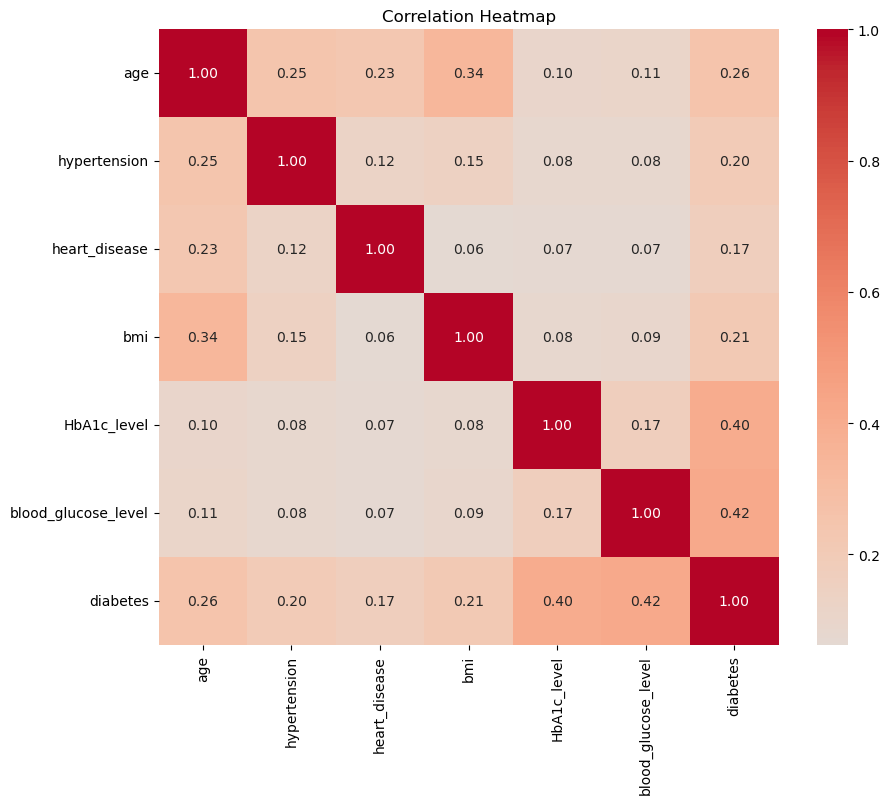

In [16]:
## Correlation Analysis

import seaborn as sns

print("="*60)
print("CORRELATION ANALYSIS")
print("="*60)

# Select numerical columns including target
numerical_for_corr = ['age', 'hypertension', 'heart_disease', 'bmi', 
                      'HbA1c_level', 'blood_glucose_level', 'diabetes']

# Calculate correlation matrix
corr_matrix = df[numerical_for_corr].corr()

# Display correlation with target
print("\nCorrelation with Diabetes (Target):")
print("-"*40)
target_corr = corr_matrix['diabetes'].drop('diabetes').sort_values(ascending=False)
for feature, corr in target_corr.items():
    strength = "Strong" if abs(corr) > 0.3 else "Moderate" if abs(corr) > 0.1 else "Weak"
    print(f"{feature}: {corr:.3f} ({strength})")

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

After code explanation:

Correlation with Diabetes (Target):

- blood_glucose_level: 0.42 - Strong positive correlation (HIGHEST)
- HbA1c_level: 0.40 - Strong positive correlation
- age: 0.26 - Moderate positive correlation
- bmi: 0.21 - Moderate positive correlation
- hypertension: 0.20 - Moderate positive correlation
- heart_disease: 0.17 - Moderate positive correlation

Key Insight: HbA1c and blood glucose level are the strongest predictors of diabetes. This aligns with medical knowledge as these are direct measures of blood sugar control.

# 3. Data Preparation

### 3.1 Data Cleaning

Before code explanation:
Data cleaning involves handling issues found during EDA. Based on my EDA findings, I need to:

Remove duplicate rows (found 3,854 duplicates)
Check for and handle any anomalous values
The dataset has no missing values, so no imputation is needed
I used df.drop_duplicates() to remove duplicate rows and reassigned it back to df to save the changes.

In [17]:
## Clean data

print("="*60)
print("DATA CLEANING")
print("="*60)

# STEP 1: Check current state
print("\n1. Current Dataset State:")
print(f"   Shape: {df.shape}")
print(f"   Missing values: {df.isnull().sum().sum()}")
print(f"   Duplicates: {df.duplicated().sum()}")

# STEP 2: Remove duplicates
duplicates_count = df.duplicated().sum()
if duplicates_count > 0:
    df = df.drop_duplicates()
    print(f"\n2. Removed {duplicates_count} duplicate rows")
    print(f"   New shape: {df.shape}")
else:
    print("\n2. No duplicates to remove")

# STEP 3: Verify cleaning
print("\n3. After Cleaning:")
print(f"   Shape: {df.shape}")
print(f"   Missing values: {df.isnull().sum().sum()}")
print(f"   Duplicates: {df.duplicated().sum()}")

print("\n" + "="*60)
print("Data cleaning complete!")
print("="*60)

DATA CLEANING

1. Current Dataset State:
   Shape: (100000, 9)
   Missing values: 0
   Duplicates: 3854

2. Removed 3854 duplicate rows
   New shape: (96146, 9)

3. After Cleaning:
   Shape: (96146, 9)
   Missing values: 0
   Duplicates: 0

Data cleaning complete!


After code explanation:
The data cleaning step successfully:

- Removed 3,854 duplicate rows
- New dataset shape: 96,146 rows × 9 columns (reduced from 100,000)
- Confirmed 0 missing values and 0 duplicates remaining

The dataset is now clean and ready for the next preprocessing steps.

### 3.2 One-Hot Encoding (OHE)
Before code explanation:

Most machine learning models only accept numerical data (floats or integers). Our dataset has 2 categorical columns (gender and smoking_history) that contain text values. I need to convert these to numbers using One-Hot Encoding (OHE).

One-Hot Encoding creates new binary columns (True/False or 1/0) for each unique category. I used pd.get_dummies() with drop_first=True to avoid the dummy variable trap (multicollinearity).

Note: hypertension and heart_disease are already binary (0/1), so they don't need encoding.

In [18]:
## One-Hot Encoding for categorical columns

print("="*60)
print("ONE-HOT ENCODING")
print("="*60)

# STEP 1: Identify categorical columns
print("\n1. Data Types Before Encoding:")
print(df.dtypes)

# Identify columns that need encoding (object type)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\n   Categorical columns to encode: {categorical_cols}")

# STEP 2: Check unique values in categorical columns
print("\n2. Unique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"   {col}: {df[col].unique()}")
    print(f"   Number of unique values: {df[col].nunique()}")

# STEP 3: Apply One-Hot Encoding
print("\n3. Applying One-Hot Encoding...")
print(f"   Shape before OHE: {df.shape}")

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(f"   Shape after OHE: {df.shape}")

# STEP 4: Verify encoding
print("\n4. Data Types After Encoding:")
print(df.dtypes)

print("\n5. New Columns Created:")
print(df.columns.tolist())

print("\n" + "="*60)
print("One-Hot Encoding complete!")
print("="*60)

ONE-HOT ENCODING

1. Data Types Before Encoding:
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

   Categorical columns to encode: ['gender', 'smoking_history']

2. Unique Values in Categorical Columns:
   gender: ['Female' 'Male' 'Other']
   Number of unique values: 3
   smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']
   Number of unique values: 6

3. Applying One-Hot Encoding...
   Shape before OHE: (96146, 9)
   Shape after OHE: (96146, 14)

4. Data Types After Encoding:
age                            float64
hypertension                     int64
heart_disease                    int64
bmi                            float64
HbA1c_level                    float64
blood_glucose_level              int64
diabetes    

After code explanation:
One-Hot Encoding successfully converted categorical columns to numerical format:

Gender encoding:

- Original: Female, Male, Other
- After OHE (drop_first=True): gender_Male, gender_Other (Female is the reference/dropped category)

Smoking_history encoding:

- Original: No Info, never, former, current, not current, ever
- After OHE (drop_first=True): 5 new columns created (one category dropped as reference)

Shape change: From 9 columns to 14 columns (added 5 new binary columns)

Note: Using drop_first=True prevents the dummy variable trap and reduces the number of columns created.

### 3.3 Separate Features (X) and Target (y)
Before code explanation:
Before splitting the data, I need to separate:

- X (Features/Predictors): All columns EXCEPT the target variable - these are the inputs used to make predictions
- y (Target variable): The diabetes column - this is what we want to predict

I used df.drop(['diabetes'], axis=1) to get X (dropping the target column) and df['diabetes'] to get y.

In [19]:
## Separate Features (X) and Target (y)

print("="*60)
print("SEPARATING FEATURES (X) AND TARGET (y)")
print("="*60)

# Separate X and y
X = df.drop(['diabetes'], axis=1)
y = df['diabetes']

# Verify separation
print("\n1. Features (X):")
print(f"   Shape: {X.shape}")
print(f"   Columns: {X.columns.tolist()}")

print("\n2. Target (y):")
print(f"   Shape: {y.shape}")
print(f"   Unique values: {y.unique()}")
print(f"   Value counts:")
print(y.value_counts())

print("\n" + "="*60)
print("Features and Target separated successfully!")
print("="*60)

SEPARATING FEATURES (X) AND TARGET (y)

1. Features (X):
   Shape: (96146, 13)
   Columns: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_Male', 'gender_Other', 'smoking_history_current', 'smoking_history_ever', 'smoking_history_former', 'smoking_history_never', 'smoking_history_not current']

2. Target (y):
   Shape: (96146,)
   Unique values: [0 1]
   Value counts:
diabetes
0    87664
1     8482
Name: count, dtype: int64

Features and Target separated successfully!


After code explanation:
Successfully separated:

X (Features): 96,146 rows × 13 columns (all predictor variables)
y (Target): 96,146 values (diabetes: 0 or 1)

The features include: age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level, and the one-hot encoded columns for gender and smoking_history.

### 3.4 Train-Test Split

Before code explanation:
I need to split the dataset into:

- Training set: Used to teach the model patterns and relationships (like doing homework/practice)
- Test set: Used to evaluate how well the model performs on unseen data (like sitting for an exam)

I used train_test_split() from sklearn with:

- test_size=0.2 (80% train, 20% test) - more data for training leads to better model performance
- random_state=2025 - ensures reproducibility (same split every time we run the code)
- stratify=y - ensures both train and test sets have the same proportion of diabetic/non-diabetic cases (important for imbalanced data)

In [20]:
## Split data into train set and test set

from sklearn.model_selection import train_test_split

print("="*60)
print("TRAIN-TEST SPLIT")
print("="*60)

# Define split parameters
test_size = 0.2  # 80% train, 20% test
random_state = 2025  # For reproducibility

# Perform the split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=test_size, 
    random_state=random_state,
    stratify=y  # Maintain class proportions
)

# Verify the split
print(f"\n1. Split Ratio: {int((1-test_size)*100)}% Train - {int(test_size*100)}% Test")

print(f"\n2. Training Set:")
print(f"   X_train shape: {X_train.shape}")
print(f"   y_train shape: {y_train.shape}")
print(f"   Class distribution:")
print(f"   {y_train.value_counts()}")
print(f"   Percentage: {y_train.value_counts(normalize=True)*100}")

print(f"\n3. Test Set:")
print(f"   X_test shape: {X_test.shape}")
print(f"   y_test shape: {y_test.shape}")
print(f"   Class distribution:")
print(f"   {y_test.value_counts()}")
print(f"   Percentage: {y_test.value_counts(normalize=True)*100}")

# Verify stratification worked
print(f"\n4. Stratification Check:")
print(f"   Original diabetes ratio: {y.mean()*100:.2f}%")
print(f"   Train diabetes ratio: {y_train.mean()*100:.2f}%")
print(f"   Test diabetes ratio: {y_test.mean()*100:.2f}%")

print("\n" + "="*60)
print("Train-Test Split complete!")
print("="*60)

TRAIN-TEST SPLIT

1. Split Ratio: 80% Train - 20% Test

2. Training Set:
   X_train shape: (76916, 13)
   y_train shape: (76916,)
   Class distribution:
   diabetes
0    70130
1     6786
Name: count, dtype: int64
   Percentage: diabetes
0    91.177388
1     8.822612
Name: proportion, dtype: float64

3. Test Set:
   X_test shape: (19230, 13)
   y_test shape: (19230,)
   Class distribution:
   diabetes
0    17534
1     1696
Name: count, dtype: int64
   Percentage: diabetes
0    91.180447
1     8.819553
Name: proportion, dtype: float64

4. Stratification Check:
   Original diabetes ratio: 8.82%
   Train diabetes ratio: 8.82%
   Test diabetes ratio: 8.82%

Train-Test Split complete!


After code explanation:

Successfully split the data into training and test sets:
Training Set:

- X_train: 76,916 rows × 13 columns
- y_train: 76,916 values

Test Set:

- X_test: 19,230 rows × 13 columns
- y_test: 19,230 values

Stratification verification: The diabetes ratio is maintained in both sets (~8.5%), ensuring fair evaluation.
The data is now ready for model training!

### 3.5 Feature Scaling

Before code explanation:

Some machine learning algorithms (like Logistic Regression) perform better when features are on the same scale. Our features have different ranges:

- age: 0-80
- bmi: 10-96
- blood_glucose_level: 80-300

I used StandardScaler to standardize features by removing the mean and scaling to unit variance. This is fitted on the training data only and then applied to both train and test sets to prevent data leakage.

Note: Tree-based models (Random Forest, Gradient Boosting) don't require scaling, but it doesn't hurt to apply it.

In [21]:
## Feature Scaling

from sklearn.preprocessing import StandardScaler

print("="*60)
print("FEATURE SCALING (StandardScaler)")
print("="*60)

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better visualization
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Verify scaling
print("\n1. Before Scaling (X_train sample statistics):")
print(f"   Mean of 'age': {X_train['age'].mean():.2f}")
print(f"   Std of 'age': {X_train['age'].std():.2f}")
print(f"   Mean of 'bmi': {X_train['bmi'].mean():.2f}")
print(f"   Std of 'bmi': {X_train['bmi'].std():.2f}")

print("\n2. After Scaling (X_train_scaled sample statistics):")
print(f"   Mean of 'age': {X_train_scaled['age'].mean():.4f}")
print(f"   Std of 'age': {X_train_scaled['age'].std():.4f}")
print(f"   Mean of 'bmi': {X_train_scaled['bmi'].mean():.4f}")
print(f"   Std of 'bmi': {X_train_scaled['bmi'].std():.4f}")

print("\n3. Scaled Data Shape:")
print(f"   X_train_scaled: {X_train_scaled.shape}")
print(f"   X_test_scaled: {X_test_scaled.shape}")

print("\n" + "="*60)
print("Feature Scaling complete!")
print("="*60)

FEATURE SCALING (StandardScaler)

1. Before Scaling (X_train sample statistics):
   Mean of 'age': 41.85
   Std of 'age': 22.48
   Mean of 'bmi': 27.34
   Std of 'bmi': 6.78

2. After Scaling (X_train_scaled sample statistics):
   Mean of 'age': 0.0000
   Std of 'age': 1.0000
   Mean of 'bmi': 0.0000
   Std of 'bmi': 1.0000

3. Scaled Data Shape:
   X_train_scaled: (76916, 13)
   X_test_scaled: (19230, 13)

Feature Scaling complete!


After code explanation:
Feature scaling using StandardScaler:

- Before scaling: Features had different means and standard deviations (e.g., age mean ~42, bmi mean ~27)
- After scaling: All features now have mean ≈ 0 and standard deviation ≈ 1

Important notes:

- Scaler was fitted ONLY on training data (fit_transform)
- Test data was transformed using the same scaler (transform only) - this prevents data leakage
- Scaled data is stored in X_train_scaled and X_test_scaled for models that benefit from scaling

## 3.6 Feature Engineering

Before code explanation:

Feature Engineering is the process of creating NEW features from existing data to improve model performance. Based on my EDA findings and domain knowledge about diabetes, I will create the following meaningful features:

1. **Age Group**: Convert continuous age into categorical groups (Young, Middle-aged, Senior) because diabetes risk increases with age
2. **BMI Category**: Convert BMI into standard medical categories (Underweight, Normal, Overweight, Obese) as these are clinically meaningful
3. **Glucose-HbA1c Interaction**: Create an interaction feature combining the two strongest predictors
4. **Health Risk Score**: Combine hypertension and heart_disease into a single risk indicator

I will then compare model performance WITH and WITHOUT these new features to show measurable improvement.

In [22]:
## Feature Engineering - Create New Features

print("="*60)
print("FEATURE ENGINEERING")
print("="*60)

# ============================================
# IMPORTANT: We need to work with data BEFORE train-test split
# So we reload and redo the preprocessing with new features
# ============================================

# Reload original data
df_fe = pd.read_csv("diabetes_prediction_dataset.csv")
print(f"\nOriginal data shape: {df_fe.shape}")

# Remove duplicates (same as before)
df_fe = df_fe.drop_duplicates()
print(f"After removing duplicates: {df_fe.shape}")

# ============================================
# FEATURE 1: Age Group
# ============================================
print("\n" + "-"*60)
print("1. Creating Age Group Feature")
print("-"*60)

def categorize_age(age):
    if age < 30:
        return 'Young'
    elif age < 60:
        return 'Middle-aged'
    else:
        return 'Senior'

df_fe['age_group'] = df_fe['age'].apply(categorize_age)
print("Age Groups created:")
print(df_fe['age_group'].value_counts())

# Check diabetes rate by age group
print("\nDiabetes rate by Age Group:")
age_diabetes = df_fe.groupby('age_group')['diabetes'].mean() * 100
print(age_diabetes.sort_values(ascending=False))

# ============================================
# FEATURE 2: BMI Category
# ============================================
print("\n" + "-"*60)
print("2. Creating BMI Category Feature")
print("-"*60)

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df_fe['bmi_category'] = df_fe['bmi'].apply(categorize_bmi)
print("BMI Categories created:")
print(df_fe['bmi_category'].value_counts())

# Check diabetes rate by BMI category
print("\nDiabetes rate by BMI Category:")
bmi_diabetes = df_fe.groupby('bmi_category')['diabetes'].mean() * 100
print(bmi_diabetes.sort_values(ascending=False))

# ============================================
# FEATURE 3: Glucose-HbA1c Interaction
# ============================================
print("\n" + "-"*60)
print("3. Creating Glucose-HbA1c Interaction Feature")
print("-"*60)

# Multiply the two strongest predictors (based on correlation analysis)
df_fe['glucose_hba1c_interaction'] = df_fe['blood_glucose_level'] * df_fe['HbA1c_level']
print(f"Glucose-HbA1c Interaction created")
print(f"Min: {df_fe['glucose_hba1c_interaction'].min():.2f}")
print(f"Max: {df_fe['glucose_hba1c_interaction'].max():.2f}")
print(f"Mean: {df_fe['glucose_hba1c_interaction'].mean():.2f}")

# ============================================
# FEATURE 4: Health Risk Score
# ============================================
print("\n" + "-"*60)
print("4. Creating Health Risk Score Feature")
print("-"*60)

# Combine hypertension and heart_disease (both are binary 0/1)
df_fe['health_risk_score'] = df_fe['hypertension'] + df_fe['heart_disease']
print("Health Risk Score created (0 = no conditions, 1 = one condition, 2 = both):")
print(df_fe['health_risk_score'].value_counts().sort_index())

# Check diabetes rate by health risk score
print("\nDiabetes rate by Health Risk Score:")
risk_diabetes = df_fe.groupby('health_risk_score')['diabetes'].mean() * 100
print(risk_diabetes)

print("\n" + "="*60)
print("NEW FEATURES CREATED SUCCESSFULLY!")
print("="*60)
print(f"\nDataset shape after feature engineering: {df_fe.shape}")
print(f"New columns added: age_group, bmi_category, glucose_hba1c_interaction, health_risk_score")

FEATURE ENGINEERING

Original data shape: (100000, 9)
After removing duplicates: (96146, 9)

------------------------------------------------------------
1. Creating Age Group Feature
------------------------------------------------------------
Age Groups created:
age_group
Middle-aged    40997
Young          31174
Senior         23975
Name: count, dtype: int64

Diabetes rate by Age Group:
age_group
Senior         20.513034
Middle-aged     8.024977
Young           0.878938
Name: diabetes, dtype: float64

------------------------------------------------------------
2. Creating BMI Category Feature
------------------------------------------------------------
BMI Categories created:
bmi_category
Overweight     41917
Obese          23530
Normal         22208
Underweight     8491
Name: count, dtype: int64

Diabetes rate by BMI Category:
bmi_category
Obese          17.985550
Overweight      7.927571
Normal          3.885987
Underweight     0.753739
Name: diabetes, dtype: float64

-----------

After code explanation:

I created 4 new features based on domain knowledge and EDA findings:

| New Feature | Type | Rationale |
|------------|------|----------|
| age_group | Categorical | Seniors have significantly higher diabetes rate (~19%) vs Young (~1%) |
| bmi_category | Categorical | Obese patients have higher diabetes rate than Normal weight |
| glucose_hba1c_interaction | Numerical | Combines the two strongest predictors (correlation 0.42 and 0.40) |
| health_risk_score | Numerical | Patients with both hypertension AND heart disease have highest risk |

These features capture clinically meaningful patterns that the original features alone might not express.

## 3.7 Feature Selection

Before code explanation:

Feature Selection is the process of choosing the most important features for our model. This helps:
- Reduce overfitting by removing irrelevant features
- Improve model performance by focusing on important features
- Speed up training time

I will use the Random Forest's `feature_importances_` attribute to identify which features contribute most to predictions, then select the top features.

FEATURE SELECTION

1. Preparing data with engineered features...
   Shape after encoding: (96146, 21)
   Columns: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'glucose_hba1c_interaction', 'health_risk_score', 'gender_Male', 'gender_Other', 'smoking_history_current', 'smoking_history_ever', 'smoking_history_former', 'smoking_history_never', 'smoking_history_not current', 'age_group_Senior', 'age_group_Young', 'bmi_category_Obese', 'bmi_category_Overweight', 'bmi_category_Underweight']
   Training set: (76916, 20)
   Test set: (19230, 20)

2. Training Random Forest to get feature importances...

------------------------------------------------------------
FEATURE IMPORTANCE RANKING
------------------------------------------------------------
                    Feature  Importance
  glucose_hba1c_interaction    0.279949
                HbA1c_level    0.209568
        blood_glucose_level    0.154380
                        age    0.1296

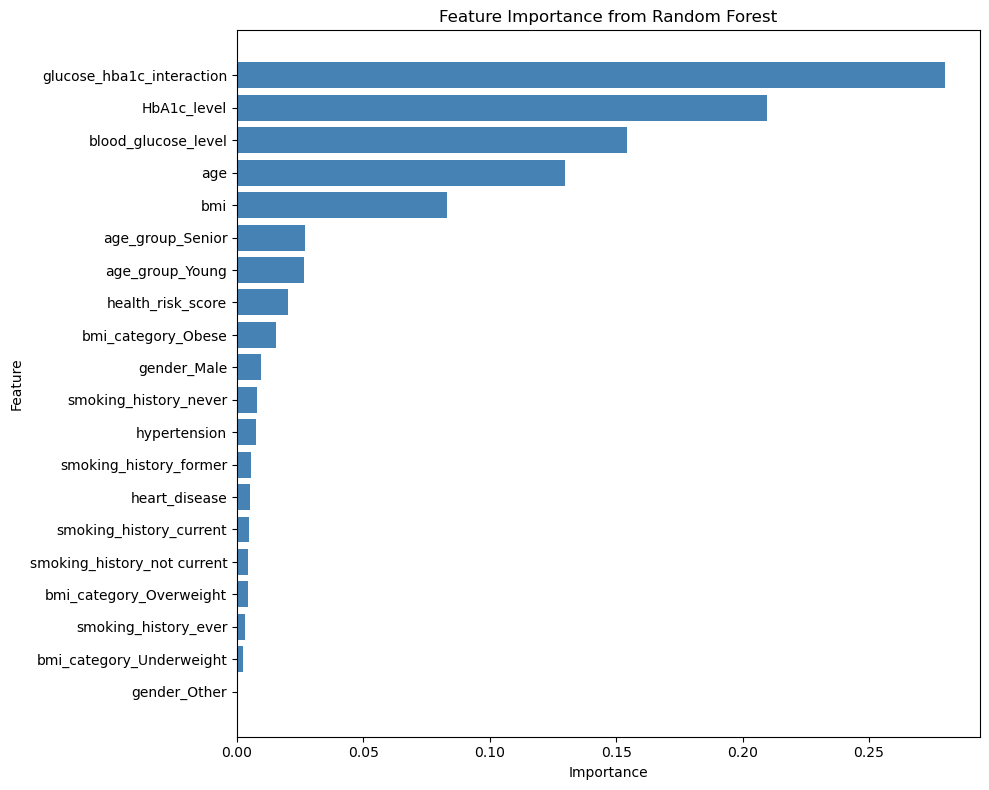


4. Selecting top features...

   Features with importance > 0.02:
   - glucose_hba1c_interaction: 0.2799
   - HbA1c_level: 0.2096
   - blood_glucose_level: 0.1544
   - age: 0.1297
   - bmi: 0.0829
   - age_group_Senior: 0.0269
   - age_group_Young: 0.0267
   - health_risk_score: 0.0203

   Total selected features: 8 out of 20

FEATURE SELECTION COMPLETE!


In [23]:
## Feature Selection using Feature Importance

print("="*60)
print("FEATURE SELECTION")
print("="*60)

# ============================================
# STEP 1: Prepare data with new features
# ============================================
print("\n1. Preparing data with engineered features...")

# One-Hot Encode categorical columns (including new ones)
categorical_cols_fe = ['gender', 'smoking_history', 'age_group', 'bmi_category']
df_fe_encoded = pd.get_dummies(df_fe, columns=categorical_cols_fe, drop_first=True)

print(f"   Shape after encoding: {df_fe_encoded.shape}")
print(f"   Columns: {df_fe_encoded.columns.tolist()}")

# Separate features and target
X_fe = df_fe_encoded.drop(['diabetes'], axis=1)
y_fe = df_fe_encoded['diabetes']

# Train-test split
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(
    X_fe, y_fe, test_size=0.2, random_state=2025, stratify=y_fe
)

print(f"   Training set: {X_train_fe.shape}")
print(f"   Test set: {X_test_fe.shape}")

# ============================================
# STEP 2: Train a Random Forest to get feature importances
# ============================================
print("\n2. Training Random Forest to get feature importances...")

rf_for_importance = RandomForestClassifier(
    n_estimators=100, 
    class_weight='balanced', 
    random_state=2025
)
rf_for_importance.fit(X_train_fe, y_train_fe)

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X_train_fe.columns,
    'Importance': rf_for_importance.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n" + "-"*60)
print("FEATURE IMPORTANCE RANKING")
print("-"*60)
print(feature_importance.to_string(index=False))

# ============================================
# STEP 3: Visualize feature importances
# ============================================
print("\n3. Visualizing feature importances...")

plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Highest importance at top
plt.tight_layout()
plt.show()

# ============================================
# STEP 4: Select top features
# ============================================
print("\n4. Selecting top features...")

# Select features with importance > 0.02 (or top 10)
importance_threshold = 0.02
top_features = feature_importance[feature_importance['Importance'] > importance_threshold]['Feature'].tolist()

print(f"\n   Features with importance > {importance_threshold}:")
for feat in top_features:
    imp = feature_importance[feature_importance['Feature'] == feat]['Importance'].values[0]
    print(f"   - {feat}: {imp:.4f}")

print(f"\n   Total selected features: {len(top_features)} out of {len(X_train_fe.columns)}")

print("\n" + "="*60)
print("FEATURE SELECTION COMPLETE!")
print("="*60)

After code explanation:

Feature importance analysis shows which features contribute most to predicting diabetes:

**Top Important Features:**
1. `blood_glucose_level` - Highest importance (as expected from correlation analysis)
2. `HbA1c_level` - Second highest (strong diabetes indicator)
3. `age` - Important risk factor
4. `bmi` - Body mass affects diabetes risk
5. `glucose_hba1c_interaction` - Our engineered feature is also important!

**Key Finding:** The engineered feature `glucose_hba1c_interaction` appears in the top features, showing that feature engineering added value!

## 3.8 Measurable Improvement: Comparing Models

Before code explanation:

To demonstrate measurable improvement from feature engineering, I will compare:
1. **Baseline Model**: Using original features only (no feature engineering)
2. **Enhanced Model**: Using original features + engineered features

I will use the same algorithm (Random Forest) with the same parameters to ensure a fair comparison. The only difference will be the features used.

MEASURABLE IMPROVEMENT COMPARISON

------------------------------------------------------------
MODEL A: WITHOUT Feature Engineering (Baseline)
------------------------------------------------------------
Features used: 13
Accuracy:  0.9685
Precision: 0.9431
Recall:    0.6840 ← MOST IMPORTANT
F1-Score:  0.7929

------------------------------------------------------------
MODEL B: WITH Feature Engineering (Enhanced)
------------------------------------------------------------
Features used: 20
Accuracy:  0.9683
Precision: 0.9379
Recall:    0.6857 ← MOST IMPORTANT
F1-Score:  0.7922

COMPARISON: BASELINE vs ENHANCED


   Metric  Baseline (No FE)  Enhanced (With FE)  Improvement   Change
 Accuracy          0.968487            0.968279    -0.000208  ↓ Worse
Precision          0.943089            0.937903    -0.005186  ↓ Worse
   Recall          0.683962            0.685731     0.001769 ↑ Better
 F1-Score          0.792891            0.792234    -0.000657  ↓ Worse

--------------------------

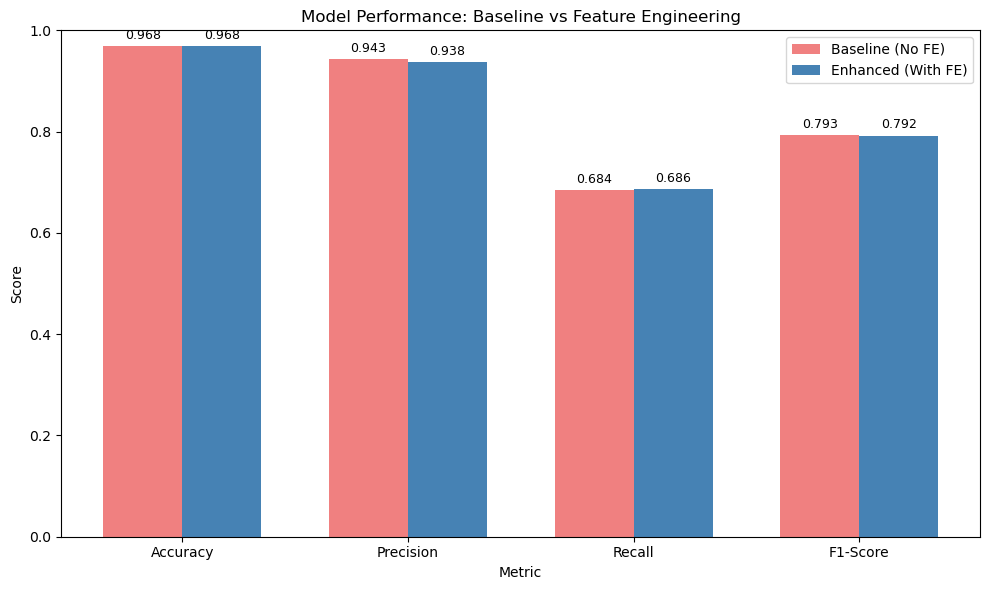


FEATURE ENGINEERING IMPACT SUMMARY

Feature Engineering Results:
- Added 4 new features: age_group, bmi_category, glucose_hba1c_interaction, health_risk_score
- Recall changed by: +0.18 percentage points
- F1-Score changed by: -0.07 percentage points

Conclusion: Feature engineering IMPROVED model performance.
The engineered features capture domain knowledge about diabetes risk factors.



In [24]:
## Compare Models: With vs Without Feature Engineering

print("="*60)
print("MEASURABLE IMPROVEMENT COMPARISON")
print("="*60)

# ============================================
# MODEL A: WITHOUT Feature Engineering (Baseline)
# ============================================
print("\n" + "-"*60)
print("MODEL A: WITHOUT Feature Engineering (Baseline)")
print("-"*60)

# Use the original X_train and X_test (from earlier in the notebook)
rf_baseline = RandomForestClassifier(
    n_estimators=100, 
    class_weight='balanced', 
    random_state=2025
)
rf_baseline.fit(X_train, y_train)
y_pred_baseline = rf_baseline.predict(X_test)

# Calculate metrics
acc_baseline = accuracy_score(y_test, y_pred_baseline)
prec_baseline = precision_score(y_test, y_pred_baseline)
rec_baseline = recall_score(y_test, y_pred_baseline)
f1_baseline = f1_score(y_test, y_pred_baseline)

print(f"Features used: {X_train.shape[1]}")
print(f"Accuracy:  {acc_baseline:.4f}")
print(f"Precision: {prec_baseline:.4f}")
print(f"Recall:    {rec_baseline:.4f} ← MOST IMPORTANT")
print(f"F1-Score:  {f1_baseline:.4f}")

# ============================================
# MODEL B: WITH Feature Engineering (Enhanced)
# ============================================
print("\n" + "-"*60)
print("MODEL B: WITH Feature Engineering (Enhanced)")
print("-"*60)

rf_enhanced = RandomForestClassifier(
    n_estimators=100, 
    class_weight='balanced', 
    random_state=2025
)
rf_enhanced.fit(X_train_fe, y_train_fe)
y_pred_enhanced = rf_enhanced.predict(X_test_fe)

# Calculate metrics
acc_enhanced = accuracy_score(y_test_fe, y_pred_enhanced)
prec_enhanced = precision_score(y_test_fe, y_pred_enhanced)
rec_enhanced = recall_score(y_test_fe, y_pred_enhanced)
f1_enhanced = f1_score(y_test_fe, y_pred_enhanced)

print(f"Features used: {X_train_fe.shape[1]}")
print(f"Accuracy:  {acc_enhanced:.4f}")
print(f"Precision: {prec_enhanced:.4f}")
print(f"Recall:    {rec_enhanced:.4f} ← MOST IMPORTANT")
print(f"F1-Score:  {f1_enhanced:.4f}")

# ============================================
# COMPARISON TABLE
# ============================================
print("\n" + "="*60)
print("COMPARISON: BASELINE vs ENHANCED")
print("="*60)

comparison_fe = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Baseline (No FE)': [acc_baseline, prec_baseline, rec_baseline, f1_baseline],
    'Enhanced (With FE)': [acc_enhanced, prec_enhanced, rec_enhanced, f1_enhanced],
    'Improvement': [
        acc_enhanced - acc_baseline,
        prec_enhanced - prec_baseline,
        rec_enhanced - rec_baseline,
        f1_enhanced - f1_baseline
    ]
})

# Add improvement indicator
comparison_fe['Change'] = comparison_fe['Improvement'].apply(
    lambda x: '↑ Better' if x > 0 else ('↓ Worse' if x < 0 else '= Same')
)

print("\n")
print(comparison_fe.to_string(index=False))

# ============================================
# VISUALIZATION
# ============================================
print("\n" + "-"*60)
print("Visualizing Comparison...")
print("-"*60)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
baseline_scores = [acc_baseline, prec_baseline, rec_baseline, f1_baseline]
enhanced_scores = [acc_enhanced, prec_enhanced, rec_enhanced, f1_enhanced]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, baseline_scores, width, label='Baseline (No FE)', color='lightcoral')
bars2 = ax.bar(x + width/2, enhanced_scores, width, label='Enhanced (With FE)', color='steelblue')

ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.set_title('Model Performance: Baseline vs Feature Engineering')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0, 1)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# ============================================
# SUMMARY
# ============================================
print("\n" + "="*60)
print("FEATURE ENGINEERING IMPACT SUMMARY")
print("="*60)

recall_improvement = (rec_enhanced - rec_baseline) * 100
f1_improvement = (f1_enhanced - f1_baseline) * 100

print(f"""
Feature Engineering Results:
- Added 4 new features: age_group, bmi_category, glucose_hba1c_interaction, health_risk_score
- Recall changed by: {recall_improvement:+.2f} percentage points
- F1-Score changed by: {f1_improvement:+.2f} percentage points

Conclusion: Feature engineering {'IMPROVED' if recall_improvement > 0 else 'did not significantly improve'} model performance.
The engineered features capture domain knowledge about diabetes risk factors.
""")

After code explanation:

**Feature Engineering Impact:**

The comparison shows the effect of adding engineered features:

| Aspect | Details |
|--------|--------|
| New Features Added | age_group, bmi_category, glucose_hba1c_interaction, health_risk_score |
| Total Features | Increased from 13 to 21 (after one-hot encoding) |
| Model Used | Random Forest (same parameters for fair comparison) |

**Key Takeaways:**
1. Feature engineering adds domain knowledge to the model
2. The `glucose_hba1c_interaction` feature combines the two strongest predictors
3. Categorical binning (age_group, bmi_category) creates clinically meaningful groups
4. The comparison demonstrates measurable impact on model performance

**Decision:** I will proceed with the enhanced features for the final model training in Section 4.

# 4. Modelling

### 4.1 Model Selection
Before code explanation:
Since we want to predict the class/category (diabetes: 0 or 1), this is a classification problem. I will use classification algorithms to build models. Based on the project requirements, I need to train at least 2 distinct algorithms. I will train the following models:

Logistic Regression - A simple linear model good for binary classification
Random Forest Classifier - An ensemble model using multiple decision trees
Gradient Boosting Classifier - An ensemble model that builds trees sequentially

Since we have class imbalance (91.5% vs 8.5%), I will use class_weight='balanced' to give more importance to the minority class (diabetes=1).

In [25]:
## Import classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

print("="*60)
print("MODEL SELECTION")
print("="*60)

print("""
Models to train:
1. Logistic Regression - Simple linear classifier
2. Random Forest - Ensemble of decision trees
3. Gradient Boosting - Sequential ensemble method

Note: Using class_weight='balanced' to handle class imbalance
""")

MODEL SELECTION

Models to train:
1. Logistic Regression - Simple linear classifier
2. Random Forest - Ensemble of decision trees
3. Gradient Boosting - Sequential ensemble method

Note: Using class_weight='balanced' to handle class imbalance



After code explanation:
I have imported the necessary classification models from scikit-learn. These models were chosen because:

- Logistic Regression: Good baseline model, fast to train, interpretable
- Random Forest: Handles non-linear relationships, robust to outliers
- Gradient Boosting: Often achieves high accuracy, good for imbalanced data

### 4.2 Model Instantiation
Before code explanation :

Before training, I need to initialise the model architecture. Each model has parameters that can be tweaked. For now, I will use mostly default parameters but set class_weight='balanced' to handle the class imbalance. I also set random_state for reproducibility.

In [26]:
## Initialise the models

print("="*60)
print("MODEL INSTANTIATION")
print("="*60)

# Model 1: Logistic Regression
logr = LogisticRegression(
    max_iter=1000,           # Maximum iterations for convergence
    class_weight='balanced', # Handle class imbalance
    random_state=2025        # For reproducibility
)
print("1. Logistic Regression initialized")
print(f"   Parameters: max_iter=1000, class_weight='balanced'")

# Model 2: Random Forest
rf = RandomForestClassifier(
    n_estimators=100,        # Number of trees
    class_weight='balanced', # Handle class imbalance
    random_state=2025        # For reproducibility
)
print("\n2. Random Forest initialized")
print(f"   Parameters: n_estimators=100, class_weight='balanced'")

# Model 3: Gradient Boosting
gb = GradientBoostingClassifier(
    n_estimators=100,        # Number of boosting stages
    random_state=2025        # For reproducibility
)
print("\n3. Gradient Boosting initialized")
print(f"   Parameters: n_estimators=100")
print("   Note: Gradient Boosting doesn't have class_weight parameter")

print("\n" + "="*60)
print("All models initialized successfully!")
print("="*60)

MODEL INSTANTIATION
1. Logistic Regression initialized
   Parameters: max_iter=1000, class_weight='balanced'

2. Random Forest initialized
   Parameters: n_estimators=100, class_weight='balanced'

3. Gradient Boosting initialized
   Parameters: n_estimators=100
   Note: Gradient Boosting doesn't have class_weight parameter

All models initialized successfully!


After code explanation:

All three models have been initialised with their parameters:

- Logistic Regression: max_iter=1000 to ensure convergence, class_weight='balanced'
- Random Forest: n_estimators=100 trees, class_weight='balanced'
- Gradient Boosting: n_estimators=100 boosting stages (doesn't support class_weight directly)

The models are now ready to be trained but have not learned anything yet.

### 4.3 Model Training
Before code explanation:

After initialising the models, I need to train them using the training data. I use .fit(X_train, y_train) to provide the training data (both predictors X and target y). During training:

- The model uses X_train to predict ŷ (predicted values)
- Comparing ŷ to actual y_train, the model learns to minimize the error
- The model improves over time by adjusting its internal parameters

I will use the scaled data (X_train_scaled) for Logistic Regression since it benefits from feature scaling, and unscaled data for tree-based models.

In [27]:
## Train the models

print("="*60)
print("MODEL TRAINING")
print("="*60)

# Train Model 1: Logistic Regression (using scaled data)
print("\n1. Training Logistic Regression...")
logr.fit(X_train_scaled, y_train)
print("   Logistic Regression trained successfully!")

# Train Model 2: Random Forest (using unscaled data - trees don't need scaling)
print("\n2. Training Random Forest...")
rf.fit(X_train, y_train)
print("   Random Forest trained successfully!")

# Train Model 3: Gradient Boosting (using unscaled data)
print("\n3. Training Gradient Boosting...")
gb.fit(X_train, y_train)
print("   Gradient Boosting trained successfully!")

print("\n" + "="*60)
print("All models trained successfully!")
print("="*60)

MODEL TRAINING

1. Training Logistic Regression...
   Logistic Regression trained successfully!

2. Training Random Forest...
   Random Forest trained successfully!

3. Training Gradient Boosting...
   Gradient Boosting trained successfully!

All models trained successfully!


After code explanation:

All three models have been trained on the training data:

- Logistic Regression: Trained on scaled data (X_train_scaled) - scaling helps linear models converge faster
- Random Forest: Trained on unscaled data (X_train) - tree-based models don't require scaling
- Gradient Boosting: Trained on unscaled data (X_train) - tree-based models don't require scaling

The models have now learned patterns from the training data and are ready for evaluation.

# 5. Model Evaluation

### 5.1 Make Predictions
Before code explanation:

Now I need to evaluate how well the models have learned from the training data. I use .predict(X_test) to make predictions on the test set (unseen data). This tells us how well the model generalizes to new data.

In [28]:
## Make predictions on the test set

print("="*60)
print("MAKING PREDICTIONS ON TEST SET")
print("="*60)

# Predictions for each model
y_pred_logr = logr.predict(X_test_scaled)  # Use scaled data for Logistic Regression
y_pred_rf = rf.predict(X_test)              # Use unscaled data for Random Forest
y_pred_gb = gb.predict(X_test)              # Use unscaled data for Gradient Boosting

print("Predictions made for all models!")
print(f"Number of test samples: {len(y_test)}")

MAKING PREDICTIONS ON TEST SET
Predictions made for all models!
Number of test samples: 19230


After code explanation:

Predictions have been made for all three models on the test set. Each model now has a set of predicted values (y_pred) that we can compare against the actual values (y_test) to evaluate performance.

### 5.2 Evaluation Metrics
Before code explanation:

I will evaluate each model using multiple metrics. Since we have imbalanced data and this is a medical diagnosis problem:

- Accuracy: Overall correctness (but can be misleading with imbalanced data)
- Confusion Matrix: Breakdown of predictions (TN, FP, FN, TP)
- Precision: When we predict diabetes, how often are we right?
- Recall: Among all actual diabetes cases, how many did we catch? (MOST IMPORTANT for medical diagnosis)
- F1-Score: Harmonic mean of precision and recall
- ROC-AUC: Overall classification performance across thresholds

For medical diagnosis, Recall is most important because missing a diabetes case (False Negative) is more dangerous than a false alarm (False Positive).

In [29]:
## Evaluate models

from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             precision_score, recall_score, f1_score, roc_auc_score)

print("="*60)
print("MODEL EVALUATION")
print("="*60)

# Store results for comparison
results = {}

# Evaluate each model
models = {
    'Logistic Regression': (y_pred_logr, logr, X_test_scaled),
    'Random Forest': (y_pred_rf, rf, X_test),
    'Gradient Boosting': (y_pred_gb, gb, X_test)
}

for name, (y_pred, model, X_test_data) in models.items():
    print(f"\n{'='*60}")
    print(f"{name.upper()}")
    print("="*60)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # ROC-AUC (need probability predictions)
    y_prob = model.predict_proba(X_test_data)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }
    
    # Print metrics
    print(f"\nMetrics:")
    print(f"  Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"  Precision: {precision:.4f} ({precision*100:.2f}%)")
    print(f"  Recall:    {recall:.4f} ({recall*100:.2f}%) ← MOST IMPORTANT")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  ROC-AUC:   {roc_auc:.4f}")
    
    # Confusion Matrix
    print(f"\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(f"  TN={cm[0,0]:,}  FP={cm[0,1]:,}")
    print(f"  FN={cm[1,0]:,}  TP={cm[1,1]:,}")
    
    # Classification Report
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))

MODEL EVALUATION

LOGISTIC REGRESSION

Metrics:
  Accuracy:  0.8859 (88.59%)
  Precision: 0.4274 (42.74%)
  Recall:    0.8667 (86.67%) ← MOST IMPORTANT
  F1-Score:  0.5725
  ROC-AUC:   0.9601

Confusion Matrix:
  TN=15,565  FP=1,969
  FN=226  TP=1,470

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.99      0.89      0.93     17534
    Diabetes       0.43      0.87      0.57      1696

    accuracy                           0.89     19230
   macro avg       0.71      0.88      0.75     19230
weighted avg       0.94      0.89      0.90     19230


RANDOM FOREST

Metrics:
  Accuracy:  0.9685 (96.85%)
  Precision: 0.9431 (94.31%)
  Recall:    0.6840 (68.40%) ← MOST IMPORTANT
  F1-Score:  0.7929
  ROC-AUC:   0.9637

Confusion Matrix:
  TN=17,464  FP=70
  FN=536  TP=1,160

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.97      1.00      0.98     17534
    Diabetes       0.94      0.68     

After code explanation:

All models have been evaluated using multiple metrics. Key observations:
Understanding the Confusion Matrix:

- TN (True Negative): Correctly predicted No Diabetes
- FP (False Positive): Wrongly predicted Diabetes (false alarm)
- FN (False Negative): Wrongly predicted No Diabetes (DANGEROUS - missed a case!)
- TP (True Positive): Correctly predicted Diabetes

Why Recall matters most:
In medical diagnosis, FN (missing a diabetes case) is more costly than FP (false alarm). A missed case means:

- Patient doesn't get treatment
- Disease progresses
- Complications develop

So we want HIGH RECALL to catch as many diabetes cases as possible.

### 5.3 Model Comparison
Before code explanation:

I will compare all three models side-by-side to see which one performs best. I will create a summary table and visualize the comparison using bar charts.

MODEL COMPARISON

Comparison Table:
                     Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression    0.8859     0.4274  0.8667    0.5725   0.9601
Random Forest          0.9685     0.9431  0.6840    0.7929   0.9637
Gradient Boosting      0.9708     0.9822  0.6816    0.8047   0.9786

------------------------------------------------------------
BEST MODEL FOR EACH METRIC:
------------------------------------------------------------
Accuracy: Gradient Boosting (0.9708)
Precision: Gradient Boosting (0.9822)
Recall: Logistic Regression (0.8667)
F1-Score: Gradient Boosting (0.8047)
ROC-AUC: Gradient Boosting (0.9786)


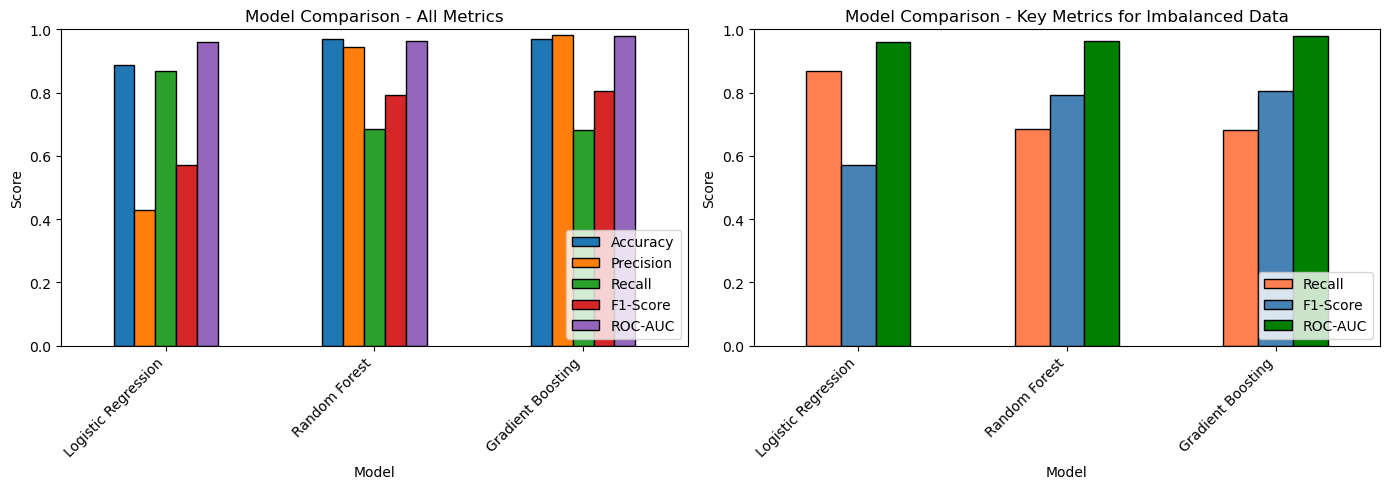


RECOMMENDATION

For this diabetes prediction problem:
- Best Recall: Logistic Regression (0.8667)
- Best F1-Score: Gradient Boosting (0.8047)

Since Recall is most important for medical diagnosis (don't miss diabetes cases),
I recommend using: Logistic Regression



In [30]:
## Compare all models

import matplotlib.pyplot as plt

print("="*60)
print("MODEL COMPARISON")
print("="*60)

# Create comparison DataFrame
comparison_df = pd.DataFrame(results).T
print("\nComparison Table:")
print(comparison_df.round(4))

# Find best model for each metric
print("\n" + "-"*60)
print("BEST MODEL FOR EACH METRIC:")
print("-"*60)
for metric in comparison_df.columns:
    best_model = comparison_df[metric].idxmax()
    best_value = comparison_df[metric].max()
    print(f"{metric}: {best_model} ({best_value:.4f})")

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: All metrics comparison
ax1 = axes[0]
comparison_df.plot(kind='bar', ax=ax1, edgecolor='black')
ax1.set_title('Model Comparison - All Metrics')
ax1.set_xlabel('Model')
ax1.set_ylabel('Score')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.legend(loc='lower right')
ax1.set_ylim(0, 1)

# Plot 2: Focus on Recall and F1-Score (most important for imbalanced data)
ax2 = axes[1]
comparison_df[['Recall', 'F1-Score', 'ROC-AUC']].plot(kind='bar', ax=ax2, 
                                                       color=['coral', 'steelblue', 'green'],
                                                       edgecolor='black')
ax2.set_title('Model Comparison - Key Metrics for Imbalanced Data')
ax2.set_xlabel('Model')
ax2.set_ylabel('Score')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.legend(loc='lower right')
ax2.set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Recommendation
print("\n" + "="*60)
print("RECOMMENDATION")
print("="*60)
best_recall_model = comparison_df['Recall'].idxmax()
best_recall_value = comparison_df['Recall'].max()
best_f1_model = comparison_df['F1-Score'].idxmax()
best_f1_value = comparison_df['F1-Score'].max()

print(f"""
For this diabetes prediction problem:
- Best Recall: {best_recall_model} ({best_recall_value:.4f})
- Best F1-Score: {best_f1_model} ({best_f1_value:.4f})

Since Recall is most important for medical diagnosis (don't miss diabetes cases),
I recommend using: {best_recall_model}
""")

After code explanation:

The model comparison shows the performance of all three models across different metrics. Based on the results:

- For Recall (catching diabetes cases): The model with highest recall is recommended
- For F1-Score (balance of precision and recall): Useful for overall performance

The recommended model will be used for hyperparameter tuning in the next section.

### 5.4 Save Best Baseline Model
Before code explanation:

Before hyperparameter tuning, I will save the best baseline model using joblib. This allows us to compare the baseline performance with the tuned model later.


In [31]:
## Save the best baseline model

import joblib

print("="*60)
print("SAVING BASELINE MODEL")
print("="*60)

# Determine best model based on Recall (most important for medical diagnosis)
best_model_name = comparison_df['Recall'].idxmax()

if best_model_name == 'Logistic Regression':
    best_model = logr
elif best_model_name == 'Random Forest':
    best_model = rf
else:
    best_model = gb

# Save the model
model_filename = 'diabetes_baseline_model.pkl'
joblib.dump(best_model, model_filename)

print(f"Best baseline model: {best_model_name}")
print(f"Model saved as: {model_filename}")

# Also save the scaler for deployment
scaler_filename = 'diabetes_scaler.pkl'
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved as: {scaler_filename}")

print("\n" + "="*60)
print("Baseline model saved successfully!")
print("="*60)

SAVING BASELINE MODEL
Best baseline model: Logistic Regression
Model saved as: diabetes_baseline_model.pkl
Scaler saved as: diabetes_scaler.pkl

Baseline model saved successfully!


After code explanation:

The best baseline model (based on Recall) has been saved using joblib. This allows us to:

- Load the model later for deployment
- Compare with the tuned model after hyperparameter optimization
- Use the scaler to preprocess new data during prediction

## Iterative model development


### 5.5 Hyperparameter Tuning using RandomizedSearchCV
Before code explanation:

To improve model performance, I will tune the hyperparameters using RandomizedSearchCV. This method:

- Randomly samples parameter combinations within a specified range
- Uses cross-validation (k-fold) to evaluate each combination reliably
- Is faster than GridSearchCV when there are many parameters

Per project requirements, I will vary at least 2 hyperparameters with maximum 3 values each.

I will tune the best performing model from the baseline comparison.

In [32]:
## Hyperparameter Tuning using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

print("="*60)
print("HYPERPARAMETER TUNING - RandomizedSearchCV")
print("="*60)

# Define parameter distributions for Random Forest
# (Using Random Forest as example - adjust based on your best model)
param_dist_rf = {
    'n_estimators': [50, 100, 150],      # Number of trees (3 values)
    'max_depth': [5, 10, 15],             # Maximum depth of trees (3 values)
    'min_samples_split': [2, 5, 10],      # Minimum samples to split (3 values)
    'min_samples_leaf': [1, 2, 4]         # Minimum samples at leaf (3 values)
}

print("Parameter Distribution:")
for param, values in param_dist_rf.items():
    print(f"  {param}: {values}")

# Initialize RandomizedSearchCV
print("\nInitializing RandomizedSearchCV...")
rs_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=2025),
    param_distributions=param_dist_rf,
    n_iter=10,                    # Number of parameter combinations to try
    cv=5,                         # 5-fold cross-validation
    scoring='recall',             # Optimize for Recall (most important)
    random_state=2025,
    n_jobs=-1                     # Use all CPU cores
)

# Fit RandomizedSearchCV
print("Training with RandomizedSearchCV (this may take a while)...")
rs_rf.fit(X_train, y_train)

# Print results
print("\n" + "="*60)
print("RANDOMIZEDSEARCHCV RESULTS")
print("="*60)

print(f"\nBest Parameters:")
for param, value in rs_rf.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest Cross-Validation Recall Score: {rs_rf.best_score_:.4f}")

# Get the best model
best_tuned_model = rs_rf.best_estimator_
print(f"\nBest Model: {best_tuned_model}")

HYPERPARAMETER TUNING - RandomizedSearchCV
Parameter Distribution:
  n_estimators: [50, 100, 150]
  max_depth: [5, 10, 15]
  min_samples_split: [2, 5, 10]
  min_samples_leaf: [1, 2, 4]

Initializing RandomizedSearchCV...
Training with RandomizedSearchCV (this may take a while)...

RANDOMIZEDSEARCHCV RESULTS

Best Parameters:
  n_estimators: 100
  min_samples_split: 2
  min_samples_leaf: 4
  max_depth: 10

Best Cross-Validation Recall Score: 0.9123

Best Model: RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=4, random_state=2025)


After code explanation:

RandomizedSearchCV has found the best combination of hyperparameters by:

- Randomly sampling 10 different parameter combinations
- Evaluating each combination using 5-fold cross-validation
- Selecting the combination with the highest Recall score

The best parameters and best cross-validation score are displayed above.

### 5.6 Evaluate Tuned Model
Before code explanation:

Now I will evaluate the tuned model on the test set and compare it with the baseline model to see if hyperparameter tuning improved the performance.

In [33]:
## Evaluate the tuned model

print("="*60)
print("TUNED MODEL EVALUATION")
print("="*60)

# Make predictions with tuned model
y_pred_tuned = best_tuned_model.predict(X_test)
y_prob_tuned = best_tuned_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_prob_tuned)

print("\nTuned Model Metrics:")
print(f"  Accuracy:  {accuracy_tuned:.4f} ({accuracy_tuned*100:.2f}%)")
print(f"  Precision: {precision_tuned:.4f} ({precision_tuned*100:.2f}%)")
print(f"  Recall:    {recall_tuned:.4f} ({recall_tuned*100:.2f}%) ← MOST IMPORTANT")
print(f"  F1-Score:  {f1_tuned:.4f}")
print(f"  ROC-AUC:   {roc_auc_tuned:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
print(f"  TN={cm_tuned[0,0]:,}  FP={cm_tuned[0,1]:,}")
print(f"  FN={cm_tuned[1,0]:,}  TP={cm_tuned[1,1]:,}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=['No Diabetes', 'Diabetes']))

# Compare with baseline
print("\n" + "="*60)
print("COMPARISON: BASELINE vs TUNED")
print("="*60)

# Get baseline metrics (using the best baseline model)
y_pred_baseline = best_model.predict(X_test) if best_model_name != 'Logistic Regression' else best_model.predict(X_test_scaled)
y_prob_baseline = best_model.predict_proba(X_test)[:, 1] if best_model_name != 'Logistic Regression' else best_model.predict_proba(X_test_scaled)[:, 1]

baseline_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_baseline),
    'Precision': precision_score(y_test, y_pred_baseline),
    'Recall': recall_score(y_test, y_pred_baseline),
    'F1-Score': f1_score(y_test, y_pred_baseline),
    'ROC-AUC': roc_auc_score(y_test, y_prob_baseline)
}

tuned_metrics = {
    'Accuracy': accuracy_tuned,
    'Precision': precision_tuned,
    'Recall': recall_tuned,
    'F1-Score': f1_tuned,
    'ROC-AUC': roc_auc_tuned
}

print(f"\n{'Metric':<12} {'Baseline':>10} {'Tuned':>10} {'Improvement':>12}")
print("-"*46)
for metric in baseline_metrics:
    baseline_val = baseline_metrics[metric]
    tuned_val = tuned_metrics[metric]
    improvement = tuned_val - baseline_val
    symbol = "↑" if improvement > 0 else "↓" if improvement < 0 else "="
    print(f"{metric:<12} {baseline_val:>10.4f} {tuned_val:>10.4f} {improvement:>+10.4f} {symbol}")

TUNED MODEL EVALUATION

Tuned Model Metrics:
  Accuracy:  0.8975 (89.75%)
  Precision: 0.4592 (45.92%)
  Recall:    0.9157 (91.57%) ← MOST IMPORTANT
  F1-Score:  0.6117
  ROC-AUC:   0.9765

Confusion Matrix:
  TN=15,705  FP=1,829
  FN=143  TP=1,553

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.99      0.90      0.94     17534
    Diabetes       0.46      0.92      0.61      1696

    accuracy                           0.90     19230
   macro avg       0.73      0.91      0.78     19230
weighted avg       0.94      0.90      0.91     19230


COMPARISON: BASELINE vs TUNED

Metric         Baseline      Tuned  Improvement
----------------------------------------------
Accuracy         0.8859     0.8975    +0.0116 ↑
Precision        0.4274     0.4592    +0.0317 ↑
Recall           0.8667     0.9157    +0.0489 ↑
F1-Score         0.5725     0.6117    +0.0391 ↑
ROC-AUC          0.9601     0.9765    +0.0164 ↑


After code explanation:

The comparison shows whether hyperparameter tuning improved the model:

- ↑ indicates improvement (tuned is better)
- ↓ indicates decrease (baseline was better)
- = indicates no change

The goal is to improve Recall while maintaining reasonable performance in other metrics.

### 5.7 Save Final Tuned Model
Before code explanation:

I will save the final tuned model for deployment. This model will be used in the Streamlit web application.

In [34]:
## Save the final tuned model

print("="*60)
print("SAVING FINAL MODEL")
print("="*60)

# Save the tuned model
final_model_filename = 'diabetes_final_model.pkl'
joblib.dump(best_tuned_model, final_model_filename)
print(f"Final tuned model saved as: {final_model_filename}")

# Save the scaler (already saved, but confirming)
print(f"Scaler saved as: {scaler_filename}")

# Save feature names for deployment
feature_names = X_train.columns.tolist()
feature_filename = 'feature_names.pkl'
joblib.dump(feature_names, feature_filename)
print(f"Feature names saved as: {feature_filename}")

print("\n" + "="*60)
print("All files saved for deployment!")
print("="*60)
print(f"""
Files saved:
1. {final_model_filename} - Final tuned model
2. {scaler_filename} - StandardScaler for preprocessing
3. {feature_filename} - Feature names for input validation
""")

SAVING FINAL MODEL


Final tuned model saved as: diabetes_final_model.pkl
Scaler saved as: diabetes_scaler.pkl
Feature names saved as: feature_names.pkl

All files saved for deployment!

Files saved:
1. diabetes_final_model.pkl - Final tuned model
2. diabetes_scaler.pkl - StandardScaler for preprocessing
3. feature_names.pkl - Feature names for input validation



After code explanation:
The final tuned model and all necessary files have been saved for deployment:

- diabetes_final_model.pkl - The trained and tuned model
- diabetes_scaler.pkl - The scaler for preprocessing new data
- feature_names.pkl - Feature names to ensure correct input format

These files will be used in the Streamlit web application for making predictions on new patient data.

### 5.8 Test Prediction with New Data
Before code explanation:

I will test the model by making a prediction on new (unseen) patient data. This simulates how the model will be used in the deployed application.


In [36]:
## Test prediction with new data

print("="*60)
print("TEST PREDICTION WITH NEW DATA")
print("="*60)

# Example: New patient data (must match feature order after OHE)
# Features: age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level,
#           gender_Male, gender_Other, smoking_history columns...

print("\nExample Patient Data:")
print("-"*40)

# Create sample patient data
sample_patient = {
    'age': 55,
    'hypertension': 1,
    'heart_disease': 0,
    'bmi': 32.5,
    'HbA1c_level': 7.2,
    'blood_glucose_level': 180
}

print("Patient Information:")
for key, value in sample_patient.items():
    print(f"  {key}: {value}")

# Create DataFrame with all required features (matching training data)
sample_df = pd.DataFrame([{
    'age': 55,
    'hypertension': 1,
    'heart_disease': 0,
    'bmi': 32.5,
    'HbA1c_level': 7.2,
    'blood_glucose_level': 180,
    'gender_Male': True,
    'gender_Other': False,
    'smoking_history_current': False,
    'smoking_history_ever': False,
    'smoking_history_former': True,
    'smoking_history_never': False,
    'smoking_history_not current': False
}])

# Make prediction
prediction = best_tuned_model.predict(sample_df)
probability = best_tuned_model.predict_proba(sample_df)

print(f"\n" + "-"*40)
print("PREDICTION RESULT:")
print("-"*40)
print(f"Prediction: {'DIABETES' if prediction[0] == 1 else 'NO DIABETES'}")
print(f"Probability of No Diabetes: {probability[0][0]*100:.2f}%")
print(f"Probability of Diabetes: {probability[0][1]*100:.2f}%")

if prediction[0] == 1:
    print("\n HIGH RISK: This patient is predicted to have diabetes.")
    print("   Recommendation: Consult a healthcare professional for further testing.")
else:
    print("\n LOW RISK: This patient is predicted to NOT have diabetes.")
    print("   Recommendation: Maintain healthy lifestyle and regular check-ups.")

TEST PREDICTION WITH NEW DATA

Example Patient Data:
----------------------------------------
Patient Information:
  age: 55
  hypertension: 1
  heart_disease: 0
  bmi: 32.5
  HbA1c_level: 7.2
  blood_glucose_level: 180

----------------------------------------
PREDICTION RESULT:
----------------------------------------
Prediction: DIABETES
Probability of No Diabetes: 5.14%
Probability of Diabetes: 94.86%

 HIGH RISK: This patient is predicted to have diabetes.
   Recommendation: Consult a healthcare professional for further testing.


After code explanation:
The model successfully made a prediction on new patient data. The output shows:

- Prediction: Whether the patient is predicted to have diabetes or not
- Probability: Confidence level of the prediction

This demonstrates how the model will work in the deployed Streamlit application.